<a href="https://colab.research.google.com/github/Geometallurgy/LCT_notebooks/blob/main/geomet_salobo_icj_ufmg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font size = 12 color = royalblue> INTRODUÇÃO </font>
***

Modelagem Geometalúrgica - Estudo de Caso da Mina de Cobre do Salobo (Vale)

**Autores(a):**

Arthur Souza;

Davi Pedersoli Moura;

Gabriel Martins Preto;

João Vitor Figueiredo Guerra;

Maria Eduarda Meneses Santos;


**Orientador:** Douglas B. Mazzinghy

Instituição: Departamento de Engenharia de Minas da UFMG

Semana de Iniciação Científica Júnior – 2025


##  BIBLIOTECAS

In [1]:
!pip install stepwise-regression

In [2]:
import numpy as np # Biblioteca para operações matemáticas eficientes com arrays
import pandas as pd # Importação e manipulação de dados em DataFrames
import matplotlib.pyplot as plt # Criação de gráficos estáticos
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import math
import seaborn as sns # Criação de gráficos estatísticos mais avançados
from stepwise_regression import step_reg
# Statsmodels: a biblioteca principal para modelagem e análise estatística
import statsmodels.api as sm
# Módulos específicos do Statsmodels para testes estatísticos e diagnósticos
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import qqplot # Para Q-Q plot dos resíduos
from statsmodels.graphics.tsaplots import plot_acf # Para plot de autocorrelação dos resíduos
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt,het_white
from statsmodels.stats.diagnostic import linear_harvey_collier, linear_reset, spec_white
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from yellowbrick.regressor import CooksDistance
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor

# Biblioteca para suprimir avisos de código
import warnings
warnings.filterwarnings("ignore")

# Configurações para o Pandas
pd.set_option('display.max_columns', 500)

# Scipy: biblioteca para computação científica
from scipy.stats import kurtosis

***
# <font size = 12 color = green> CONHECENDO DADOS </font>
***


## [1] BAIXANDO DATASET

O dataset comminution.csv é um conjunto de dados geometalúrgicos voltado para a cominuição. Ele contém dados de diversas amostras de minério , e as respectivas medições de variáveis(teores) que influenciam o processo de moagem.

In [3]:
url1 = 'https://zenodo.org/records/7051975/files/comminution.csv?download=1' #link do dataset utilizado;

df_comminution = pd.read_csv(url1) # df é nome do dataframe que vai carregar os dados iniciais das amostras e o resultado do calculo do Bond Work Index (BWI).

s = 'https://zenodo.org/record/7051975/files/flotation.csv?download=1' #link do dataset utilizado;

df_flotation = pd.read_csv(s) # df é nome do dataframe que vai carregar os dados iniciais das amostras e o resultado do calculo de Recuperação Metalúrgica (LCT).

url3 = 'https://zenodo.org/record/7051975/files/drillholes.csv?download=1'  #link do dataset utilizado;

df_drillholes = pd.read_csv(url3) # df é nome do dataframe que vai carregar os dados dos furos.

In [4]:
#Mostra amostras de dados presentes em todos os datasets
print("\n=== COMMINUTION ===")
print(df_comminution.head())

print("\n=== FLOTATION ===")
print(df_flotation.head())

print("\n=== DRILLHOLES ===")
print(df_drillholes.head())


=== COMMINUTION ===
   HOLEID           X          Y       Z       th1       th2       th3  \
0     120  342.445175 -382.72032  337.81  0.042350  0.176221  0.402691   
1     121  127.095175  -88.51032  251.62  0.038470  0.191321  0.410466   
2     122  186.685175 -344.57032  334.54  0.030830  0.151751  0.326471   
3     123  297.195175 -219.90032  266.55  0.031255  0.196491  0.419411   
4     124  365.475175 -180.95032  264.01  0.038660  0.168131  0.382681   

           F80         P80         M      A        Al ppm  C ppm  \
0  2174.237514   97.105344  0.808429  150.0  53061.375831  534.0   
1  2188.542916  115.508073  0.855116  150.0  48197.507191  314.0   
2  1983.825716  102.098877  0.973609  150.0  55575.355450  499.5   
3  1969.796571  116.762223  1.047199  150.0  55596.590909  630.0   
4  2222.819841  100.826620  1.155266  150.0  60304.597701  150.0   

         Ca ppm  Carbono Grafite ppm       Cl ppm       Cu ppm        F ppm  \
0   7292.257400                  NaN  3313.417

## [2] CONFERINDO DADOS

In [5]:
 # confere se não ha valores nulos nos dataframes, o que impactaria no funcionamento do modelo:
print("\n=== COMMINUTION ===")
print(df_comminution.isnull().sum())
print("\n=== FLOTATION ===")
print(df_flotation.isnull().sum())
print("\n=== DRILLHOLES ===")
print(df_drillholes.isnull().sum())


=== COMMINUTION ===
HOLEID                  0
X                       0
Y                       0
Z                       0
th1                     0
th2                     0
th3                     0
F80                     0
P80                     0
M                       0
A                       0
Al ppm                  0
C ppm                   0
Ca ppm                  0
Carbono Grafite ppm    12
Cl ppm                  1
Cu ppm                  0
F ppm                   0
Fe ppm                  0
K ppm                   0
Mg ppm                  0
Mn ppm                  0
Na ppm                  0
P ppm                   0
S ppm                   0
Si ppm                  0
Th ppm                 34
U ppm                   2
dtype: int64

=== FLOTATION ===
HOLEID    0
X         0
Y         0
Z         0
fr        0
xr        0
LCT       1
Ag ppm    0
Al ppm    0
Au ppm    0
C ppm     0
Ca ppm    0
Cl ppm    4
Cu ppm    0
F ppm     0
Fe ppm    0
K ppm     0
Mg ppm    0
Mn 

In [6]:
#Os valores nulos podem fazer o codigo simplesmente não funcionar, por isso devem ser tratados.
# Removendo linhas com valores nulos nas colunas 'Cl ppm' e 'U ppm' da tabela de cominuição.
df_comminution.dropna(subset=['Cl ppm', 'U ppm'], inplace=True)

# Calculando a mediana(boa opção para evitar valores extremos) da coluna 'Carbono Grafite ppm' da tabela de cominuição
mediana_carbono_grafite = df_comminution['Carbono Grafite ppm'].median()
# Preenchendo os valores nulos com a mediana calculada
df_comminution['Carbono Grafite ppm'] = df_comminution['Carbono Grafite ppm'].fillna(mediana_carbono_grafite)

#A coluna Th ppm tem muitas linhas null,portanto, a coluna foi removida.
df_comminution.drop('Th ppm', axis=1, inplace=True)

# Nova verificação para garantir que não há mais valores nulos.
print("\nVerificação final após a imputação:")
print(df_comminution.isnull().sum())


Verificação final após a imputação:
HOLEID                 0
X                      0
Y                      0
Z                      0
th1                    0
th2                    0
th3                    0
F80                    0
P80                    0
M                      0
A                      0
Al ppm                 0
C ppm                  0
Ca ppm                 0
Carbono Grafite ppm    0
Cl ppm                 0
Cu ppm                 0
F ppm                  0
Fe ppm                 0
K ppm                  0
Mg ppm                 0
Mn ppm                 0
Na ppm                 0
P ppm                  0
S ppm                  0
Si ppm                 0
U ppm                  0
dtype: int64


##[3] VISUALIZAÇÃO DOS DADOS

In [7]:
# Criar o gráfico de dispersão 3D
fig = go.Figure()

# Adicionar amostras de furos de sondagem
fig.add_trace(go.Scatter3d(
    x=df_drillholes['X'],
    y=df_drillholes['Y'],
    z=df_drillholes['Z'],
    mode='markers',
    marker=dict(
        size=2,
        color='gray',
        opacity=0.8
    ),
    name='2000 drillholes samples',
    legendgrouptitle_text="Dataset Types",
    legendgroup="drillholes"
))

# Adicionar amostras de cominuição
fig.add_trace(go.Scatter3d(
    x=df_comminution['X'],
    y=df_comminution['Y'],
    z=df_comminution['Z'],
    mode='markers',
    marker=dict(
        size=2,
        color='magenta',
        opacity=0.8
    ),

    name='60 comminution samples',
    legendgroup="comminution"
))

# Adicionar amostras de flotação
fig.add_trace(go.Scatter3d(
    x=df_flotation['X'],
    y=df_flotation['Y'],
    z=df_flotation['Z'],
    mode='markers',
    marker=dict(
        size=2,
        color='cyan',
        opacity=0.8
    ),
    name='53 flotation samples',
    legendgroup="flotation"
))

# Atualizar layout para melhor visualização COM FUNDO BRANCO
fig.update_layout(
    paper_bgcolor='white',  # Fundo branco ao redor do gráfico
    plot_bgcolor='white',   # Fundo branco da área do gráfico

    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        aspectmode='data',  # Garante a proporção correta para gráficos 3D

        # Configurações para fundo branco na cena 3D
        bgcolor='white',    # Fundo branco para a cena 3D

        # Opcional: personalizar as cores dos eixos para melhor contraste
        xaxis=dict(backgroundcolor="white", gridcolor="lightgray"),
        yaxis=dict(backgroundcolor="white", gridcolor="lightgray"),
        zaxis=dict(backgroundcolor="white", gridcolor="lightgray")
    ),

    title='Visualização 3D do Conjunto de Dados',
    showlegend=True,
    legend=dict(
        itemsizing='constant',  # Mantém o tamanho constante dos marcadores na legenda
        tracegroupgap=20,       # Aumenta o espaçamento entre os itens da legenda
        font=dict(size=12)      # Aumenta o tamanho da fonte da legenda
    )
)

# Personalizar a legenda para ter marcadores maiores
fig.update_traces(
    marker=dict(sizeref=0.1),  # Ajusta a escala dos marcadores na legenda
    selector=dict(mode='markers')
)

# Exibir o gráfico
fig.show()

In [8]:
# Criar um gráfico de histograma para mostrar a distribuição de cada teor

# Carregar os datasets (se não estiverem carregados globalmente)
# Remova ou comente as linhas abaixo se os dataframes já estão carregados
# drillholes_df = pd.read_csv('drillholes.csv')

# Identificar as colunas de teores (composição química)
coordinate_columns = ['X', 'Y', 'Z']
teor_columns = [col for col in df_drillholes.columns if col not in coordinate_columns and df_drillholes[col].dtype in ['int64', 'float64']]

# Calcular o número de linhas necessário (3 histogramas por linha)
n_cols = 3
n_rows = math.ceil(len(teor_columns) / n_cols)

# Criar subplots para os histogramas
fig_hist = make_subplots(
    rows=n_rows, cols=n_cols,
    subplot_titles=[f"Distribuição de {teor}" for teor in teor_columns],
    vertical_spacing=0.05,
    horizontal_spacing=0.05
)

# Adicionar histogramas
for i, teor in enumerate(teor_columns):
    row = i // n_cols + 1
    col = i % n_cols + 1

    fig_hist.add_trace(
        go.Histogram(
            x=df_drillholes[teor],
            name=teor,
            marker_color='lightblue',
            opacity=0.8
        ),
        row=row, col=col
    )

    # Adicionar linha vertical para a média
    mean_val = df_drillholes[teor].mean()
    fig_hist.add_trace(
        go.Scatter(
            x=[mean_val, mean_val],
            y=[0, df_drillholes[teor].value_counts().max() * 0.9], # Ajuste a altura da linha
            mode='lines',
            line=dict(color='red', width=2, dash='dash'),
            name=f'Média {teor}',
            showlegend=False
        ),
        row=row, col=col
    )

    # Adicionar anotação com a média
    # Encontrar o valor máximo da contagem para o eixo y da anotação
    hist_counts, bin_edges = np.histogram(df_drillholes[teor], bins='auto')
    max_count = hist_counts.max()

    fig_hist.add_annotation(
        x=mean_val,
        y=max_count, # Use o valor máximo da contagem
        text=f"Média: {mean_val:.2f}",
        showarrow=True, # Mostrar seta para indicar a posição da média
        arrowhead=1,
        font=dict(size=10, color='red'),
        bgcolor="rgba(255, 255, 255, 0.7)", # Fundo branco semi-transparente para a anotação
        bordercolor="red",
        borderwidth=1,
        row=row,
        col=col
    )

# Atualizar layout
fig_hist.update_layout(
    height=400 * n_rows,  # Ajustar altura baseada no número de linhas
    title_text="Distribuição dos Teores nos Furos de Sondagem",
    showlegend=False,
    bargap=0.1  # Espaçamento entre barras
)

# Atualizar eixos x para todos os subplots
for i in range(len(teor_columns)):
    fig_hist.update_xaxes(title_text="Valor", row=(i // n_cols + 1), col=(i % n_cols + 1))
    fig_hist.update_yaxes(title_text="Frequência", row=(i // n_cols + 1), col=(i % n_cols + 1))

fig_hist.show()

In [9]:
# Identificar as colunas de teores (composição química)
coordinate_columns = ['X', 'Y', 'Z']
teor_columns = [col for col in df_comminution.columns if col not in coordinate_columns and df_comminution[col].dtype in ['int64', 'float64']]


# Painel de estatísticas descritivas para cada teor do dataset comminution
print("\n" + "="*60)
print("ESTATÍSTICAS DESCRITIVAS DOS TEORES DA TABELA DE COMINUIÇÃO")
print("="*60)

for teor in teor_columns:
    print(f"\n{teor}:")
    print(f"  Mínimo: {df_comminution[teor].min():.4f}")
    print(f"  Máximo: {df_comminution[teor].max():.4f}")
    print(f"  Média: {df_comminution[teor].mean():.4f}")
    print(f"  Mediana: {df_comminution[teor].median():.4f}")
    print(f"  Desvio Padrão: {df_comminution[teor].std():.4f}")

fteor_columns = [col for col in df_flotation.columns if col not in coordinate_columns and df_flotation[col].dtype in ['int64', 'float64']]

# Painel de estatísticas descritivas para cada teor do dataset flotation
print("\n" + "="*60)
print("ESTATÍSTICAS DESCRITIVAS DOS TEORES DA TABELA DE FLOTAÇÃO")
print("="*60)

for teor in fteor_columns:
    print(f"\n{teor}:")
    print(f"  Mínimo: {df_flotation[teor].min():.4f}")
    print(f"  Máximo: {df_flotation[teor].max():.4f}")
    print(f"  Média: {df_flotation[teor].mean():.4f}")
    print(f"  Mediana: {df_flotation[teor].median():.4f}")
    print(f"  Desvio Padrão: {df_flotation[teor].std():.4f}")


ESTATÍSTICAS DESCRITIVAS DOS TEORES DA TABELA DE COMINUIÇÃO

HOLEID:
  Mínimo: 1.0000
  Máximo: 133.0000
  Média: 55.8070
  Mediana: 29.0000
  Desvio Padrão: 50.8329

th1:
  Mínimo: 0.0308
  Máximo: 0.0746
  Média: 0.0452
  Mediana: 0.0434
  Desvio Padrão: 0.0102

th2:
  Mínimo: 0.1421
  Máximo: 0.3075
  Média: 0.1909
  Mediana: 0.1850
  Desvio Padrão: 0.0308

th3:
  Mínimo: 0.3072
  Máximo: 0.5639
  Média: 0.3999
  Mediana: 0.3912
  Desvio Padrão: 0.0567

F80:
  Mínimo: 1805.0039
  Máximo: 2625.4095
  Média: 2306.2939
  Mediana: 2304.5557
  Desvio Padrão: 195.1519

P80:
  Mínimo: 76.0087
  Máximo: 131.0604
  Média: 88.2365
  Mediana: 82.8460
  Desvio Padrão: 13.5577

M:
  Mínimo: 0.6615
  Máximo: 1.2770
  Média: 0.9555
  Mediana: 0.9376
  Desvio Padrão: 0.1457

A:
  Mínimo: 106.0000
  Máximo: 150.0000
  Média: 115.2632
  Mediana: 106.0000
  Desvio Padrão: 18.0975

Al ppm:
  Mínimo: 12479.6676
  Máximo: 75070.5550
  Média: 53602.9275
  Mediana: 56375.0000
  Desvio Padrão: 13315.5064



***
# <font size = 12 color = seablue> FLOTAÇÃO </font>
***

## [1] CORRELAÇÃO DE VARIAVÉIS DO DATASET DE FLOTAÇÃO



In [10]:
correlacao_lct = df_flotation.corr()["LCT"]

indices_ordenados_lct = correlacao_lct.abs().sort_values(ascending=False).index

correlacao_final_lct = correlacao_lct.loc[indices_ordenados_lct]
print(correlacao_final_lct)
#Para avaliar os dados a serem tratados  ao longo do processo foi feita uma matriz de correlação

LCT       1.000000
P ppm     0.384213
Na ppm    0.355076
U ppm     0.319124
HOLEID   -0.299982
Ca ppm    0.260416
X         0.255369
S ppm     0.253890
Y        -0.216998
Th ppm    0.194382
Fe ppm   -0.166833
Si ppm    0.142981
F ppm    -0.140369
Au ppm    0.136067
xr        0.125551
Mn ppm   -0.120639
Ag ppm   -0.107729
Cl ppm   -0.092207
K ppm     0.073175
Cu ppm    0.071574
fr       -0.063832
Al ppm    0.057436
Mg ppm    0.043904
Ti ppm    0.024532
Z        -0.015502
C ppm     0.007737
Name: LCT, dtype: float64


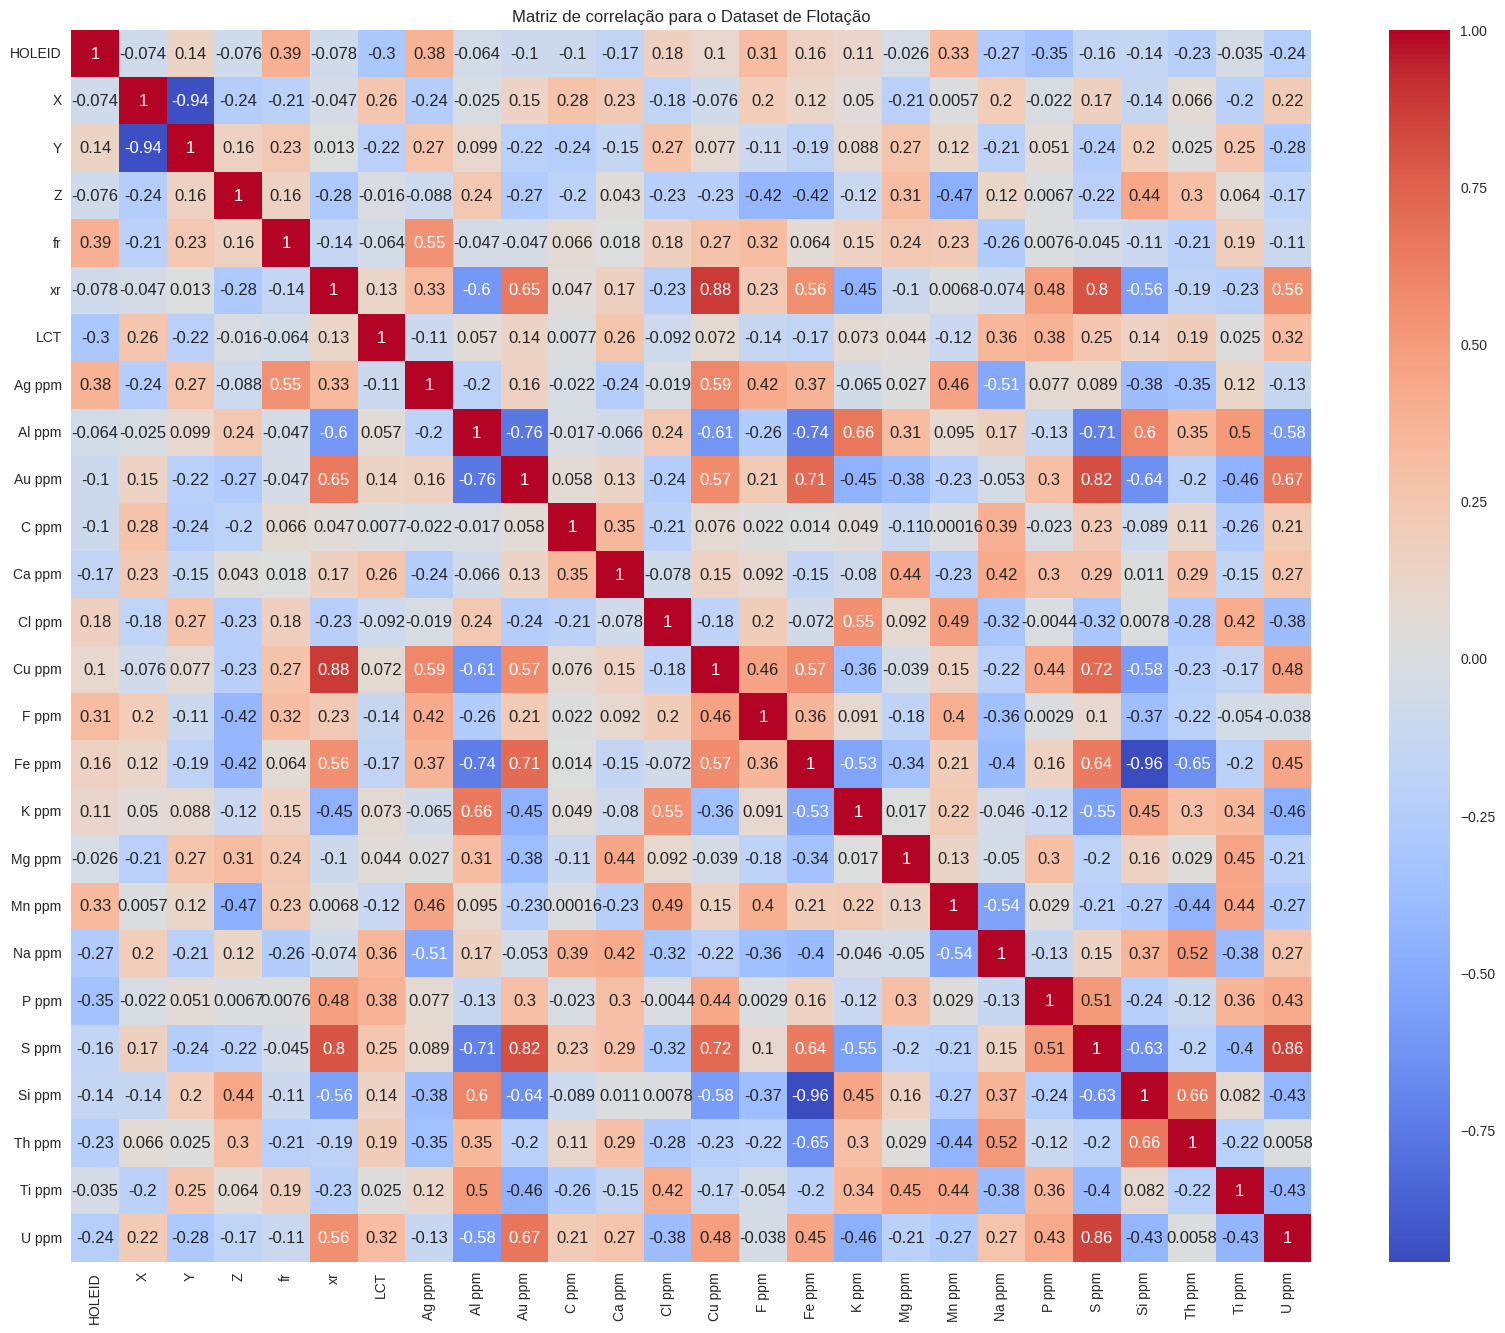

In [11]:
plt.figure(figsize=(20, 16))

sns.heatmap(df_flotation.corr(), annot=True, cmap="coolwarm")

plt.title('Matriz de correlação para o Dataset de Flotação')
plt.show()

In [12]:
df_temp_flotation = df_flotation.copy()

colunas_para_remover_flotation = ["HOLEID", "LCT", "fr", "xr", "X", "Y", "Z"]
df_temp_flotation = df_temp_flotation.drop(columns=colunas_para_remover_flotation)

In [13]:
original_ppm_cols = [col for col in df_flotation.columns if 'ppm' in col]

for col in original_ppm_cols:
    if col not in df_temp_flotation.columns:
        df_temp_flotation[col] = df_flotation[col]

correlacao_lct_todas = df_temp_flotation.corrwith(df_flotation["LCT"])

correlacao_lct_todas = correlacao_lct_todas.dropna()

indices_ordenados_lct_todas = correlacao_lct_todas.abs().sort_values(ascending=False).index

correlacao_final_lct_todas = correlacao_lct_todas.loc[indices_ordenados_lct_todas]
print("\n Correlação de Todas as Variáveis Candidatas com LCT")
print(correlacao_final_lct_todas)


 Correlação de Todas as Variáveis Candidatas com LCT
P ppm     0.384213
Na ppm    0.355076
U ppm     0.319124
Ca ppm    0.260416
S ppm     0.253890
Th ppm    0.194382
Fe ppm   -0.166833
Si ppm    0.142981
F ppm    -0.140369
Au ppm    0.136067
Mn ppm   -0.120639
Ag ppm   -0.107729
Cl ppm   -0.092207
K ppm     0.073175
Cu ppm    0.071574
Al ppm    0.057436
Mg ppm    0.043904
Ti ppm    0.024532
C ppm     0.007737
dtype: float64


## [2] PRIMEIRO MODELO RLM DE FLOTAÇÃO

MODELO GERADO SÓ COM AS VARIÁVEIS DO DATASET ORIGINAL DE FLOTAÇÃO

### AJUSTE DOS DADOS

In [14]:
missings = df_temp_flotation.isna().sum().sum()
print(f'Missings:{missings}')

Missings:4


In [15]:
df_impute1f =df_temp_flotation.interpolate(method='linear')

In [16]:
X_preflot1f = df_impute1f.copy()

y_preflot1f = df_flotation['LCT']

In [17]:
# Encontre o índice do NaN em y_preflot
nan_index = y_preflot1f[y_preflot1f.isna()].index[0]

# Remova a linha correspondente de X_preflot e y_preflot
X_preflot1f = X_preflot1f.drop(nan_index)
y_preflot1f = y_preflot1f.drop(nan_index)

# Verifique novamente se há NaNs
print("NaNs em X_preflot após remoção:", X_preflot1f.isna().sum().sum())
print("NaNs em y_preflot após remoção:", y_preflot1f.isna().sum())
print("Número de linhas em X_preflot:", len(X_preflot1f))
print("Número de linhas em y_preflot:", len(y_preflot1f))

NaNs em X_preflot após remoção: 0
NaNs em y_preflot após remoção: 0
Número de linhas em X_preflot: 52
Número de linhas em y_preflot: 52


### APLICAÇÃO DO MODELO COM STEPWISE

In [18]:
# adiciona a constante
X_preflot1f = sm.add_constant(X_preflot1f)

In [19]:
#Aplicando Backward regression para selcionar as melhores variáveis.
backselect1f = step_reg.backward_regression(X_preflot1f, y_preflot1f, 0.05,verbose=False)
backselect1f

['const', 'Na ppm', 'P ppm']

In [20]:
X_backselect1f = X_preflot1f[backselect1f]
# add a constant
X_backselect1f = sm.add_constant(X_backselect1f)

# define the model and fit it
backmodel1f = sm.OLS(y_preflot1f, X_backselect1f)

backres1f = backmodel1f.fit(cov_type='HC1')

backres1f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LCT   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     9.835
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           0.000256
Time:                        00:13:26   Log-Likelihood:                 89.031
No. Observations:                  52   AIC:                            -172.1
Df Residuals:                      49   BIC:                            -166.2
Df Model:                           2                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8205      0.016     51.102      0.000       0.789       0.852
Na ppm        3.4e-06   9.35e-07      3.638      0.000    1.57e-06    5.23e-06
P ppm       5.076e-05   1.34e-05      3.791      0.000    2.45e-05     7.7e-05
==============================================================================
Omnibus:                        8.690   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                7.894
Skew:                          -0.852   Prob(JB):                       0.0193
Kurtosis:                       3.859   Cond. No.                     1.79e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 1.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
#Aplicando Foward regression para escolher as melhores variáveis.

forwardselect1f = step_reg.forward_regression(X_preflot1f, y_preflot1f, 0.05,verbose=False)
forwardselect1f

['const', 'P ppm', 'Na ppm']

In [22]:
# add a constant
X_frontselect1f = X_preflot1f[forwardselect1f]
X_frontselect1f = sm.add_constant(X_frontselect1f)

# define the model and fit it
frontmodel1f = sm.OLS(y_preflot1f, X_frontselect1f)

frontres1f = frontmodel1f.fit(cov_type='HC1')

frontres1f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LCT   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     9.835
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           0.000256
Time:                        00:13:27   Log-Likelihood:                 89.031
No. Observations:                  52   AIC:                            -172.1
Df Residuals:                      49   BIC:                            -166.2
Df Model:                           2                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8205      0.016     51.102      0.000       0.789       0.852
P ppm       5.076e-05   1.34e-05      3.791      0.000    2.45e-05     7.7e-05
Na ppm        3.4e-06   9.35e-07      3.638      0.000    1.57e-06    5.23e-06
==============================================================================
Omnibus:                        8.690   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                7.894
Skew:                          -0.852   Prob(JB):                       0.0193
Kurtosis:                       3.859   Cond. No.                     1.79e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 1.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# Gera a equação da regressão
params1f = frontres1f.params
pvals1f = frontres1f.pvalues

# Inicia a equação com o intercepto
# O intercepto (const) é adicionado
intercepto_valor = params1f['const']
intercepto_sinal = " + " if intercepto_valor >= 0 else " - "
equacao1f = f"LCT = {intercepto_sinal}{abs(intercepto_valor):.2e}"

# Adiciona os termos significativos (p <= 0.05), excluindo a constante
for var in params1f.index:
    if var != 'const' and pvals1f[var] <= 0.05: # Verifica se não é a constante e se o p-valor é significativo
        sinal = " + " if params1f[var] >= 0 else " - "
        equacao1f += f"{sinal}{abs(params1f[var]):.2e}*{var}"

# Ajusta sinal inicial, se necessário (para o intercepto)
if equacao1f.startswith("LCT = + "):
    equacao1f = equacao1f.replace("LCT = + ", "LCT = ")

# Exibe a equação
print("\n--- Equação da Regressão ---")
print(equacao1f)


--- Equação da Regressão ---
LCT =  + 8.20e-01 + 5.08e-05*P ppm + 3.40e-06*Na ppm


In [24]:
#conferencias sobre a multicolinearidade do modelo

correlation = X_preflot1f['Na ppm'].corr(X_preflot1f['P ppm'])
print(f"A correlação entre Na ppm e P ppm é: {correlation:.2f}")

# Calcular VIF para as variáveis independentes (excluindo o intercepto)
# com o 'const' em X_preflot, o VIF para ele será muito alto e pode ser ignorado.

vif_na = variance_inflation_factor(X_preflot1f.values, X_preflot1f.columns.get_loc('Na ppm'))
vif_p = variance_inflation_factor(X_preflot1f.values, X_preflot1f.columns.get_loc('P ppm'))

print(f"VIF para 'Na ppm': {vif_na:.2f}")
print(f"VIF para 'P ppm': {vif_p:.2f}")

A correlação entre Na ppm e P ppm é: -0.13
VIF para 'Na ppm': 4.79
VIF para 'P ppm': 5.18


## [3] EXPLORANDO OPERAÇÕES ENTRE AS VARIAVÉIS DO DATASET DE FLOTAÇÃO

In [25]:
variaveis_selecionadas_lct = X_preflot1f[forwardselect1f]#as variaveis selecionadas para a geração das novas são as escolhidas pelo modelo stepwise.
variaveis_selecionadas_lct.drop(columns=['const'], inplace=True)

#### RAZAO

In [26]:
resultados_correlacao_lct_operacoes = pd.DataFrame(columns=['Variável', 'Correlação com LCT', 'Correlação_Absoluta'])
df_temp_flotation_soesp = df_temp_flotation.copy()
df_temp_flotation_sonov = df_temp_flotation.copy()

In [27]:
print("\n Análise de Correlação para RAZÕES de Variáveis (Flotação) ")
df_novas_div_lct = pd.DataFrame()
resultados_correlacao_lista_div = []

for col1 in variaveis_selecionadas_lct:
    for col2 in variaveis_selecionadas_lct:
        if col1 != col2 and (df_flotation[col2].min() > 0 or df_flotation[col2].max() < 0):
            nova_coluna_nome = f'Razao_{col1}_{col2}'
            df_novas_div_lct[nova_coluna_nome] = df_flotation[col1] / (df_flotation[col2] + 1e-9)
            correlacao = df_flotation['LCT'].corr(df_novas_div_lct[nova_coluna_nome])
            if not pd.isna(correlacao):
                resultados_correlacao_lista_div.append({'Variável': nova_coluna_nome, 'Correlação com LCT': correlacao})

df_temp_flotation = pd.concat([df_temp_flotation, df_novas_div_lct], axis=1)
df_temp_flotation_sonov = pd.concat([df_temp_flotation_sonov, df_novas_div_lct], axis=1)


resultados_correlacao_div = pd.DataFrame(resultados_correlacao_lista_div)
resultados_correlacao_div['Correlação_Absoluta'] = resultados_correlacao_div['Correlação com LCT'].abs()
resultados_correlacao_div = resultados_correlacao_div.sort_values(by='Correlação_Absoluta', ascending=False)
print("Top 10 Maiores Correlações de RAZÕES com LCT:")
print(resultados_correlacao_div.head(10))

resultados_correlacao_lct_operacoes = pd.concat([resultados_correlacao_lct_operacoes, resultados_correlacao_div], ignore_index=True)



 Análise de Correlação para RAZÕES de Variáveis (Flotação) 
Top 10 Maiores Correlações de RAZÕES com LCT:
             Variável  Correlação com LCT  Correlação_Absoluta
1  Razao_Na ppm_P ppm            0.211975             0.211975
0  Razao_P ppm_Na ppm            0.069135             0.069135


#### MULTIPLICAÇÃO

In [28]:
print("\n Análise de Correlação para MULTIPLICAÇÕES de Variáveis (Flotação) ")
df_novas_multi_lct = pd.DataFrame()
resultados_correlacao_lista_multi = []

for col1 in variaveis_selecionadas_lct:
    for col2 in variaveis_selecionadas_lct:
        if col1 != col2:
            nova_coluna_nome = f'Multi_{col1}_{col2}'
            df_novas_multi_lct[nova_coluna_nome] = df_flotation[col1] * df_flotation[col2]
            correlacao = df_flotation['LCT'].corr(df_novas_multi_lct[nova_coluna_nome])
            if not pd.isna(correlacao):
                resultados_correlacao_lista_multi.append({'Variável': nova_coluna_nome, 'Correlação com LCT': correlacao})

df_temp_flotation = pd.concat([df_temp_flotation, df_novas_multi_lct], axis=1)
df_temp_flotation_sonov = pd.concat([df_temp_flotation_sonov, df_novas_multi_lct], axis=1)

resultados_correlacao_multi = pd.DataFrame(resultados_correlacao_lista_multi)
resultados_correlacao_multi['Correlação_Absoluta'] = resultados_correlacao_multi['Correlação com LCT'].abs()
resultados_correlacao_multi = resultados_correlacao_multi.sort_values(by='Correlação_Absoluta', ascending=False)
print("Top 10 Maiores Correlações de MULTIPLICAÇÕES com LCT:")
print(resultados_correlacao_multi.head(10))

resultados_correlacao_lct_operacoes = pd.concat([resultados_correlacao_lct_operacoes, resultados_correlacao_multi], ignore_index=True)



 Análise de Correlação para MULTIPLICAÇÕES de Variáveis (Flotação) 
Top 10 Maiores Correlações de MULTIPLICAÇÕES com LCT:
             Variável  Correlação com LCT  Correlação_Absoluta
0  Multi_P ppm_Na ppm            0.334949             0.334949
1  Multi_Na ppm_P ppm            0.334949             0.334949


#### SOMA

In [29]:
print("\n Análise de Correlação para SOMAS de Variáveis (Flotação) ")
df_novas_soma_lct = pd.DataFrame()
resultados_correlacao_lista_soma = []

for col1 in variaveis_selecionadas_lct:
    for col2 in variaveis_selecionadas_lct:
        if col1 != col2:
            nova_coluna_nome = f'Soma_{col1}_{col2}'
            df_novas_soma_lct[nova_coluna_nome] = df_flotation[col1] + df_flotation[col2]
            correlacao = df_flotation['LCT'].corr(df_novas_soma_lct[nova_coluna_nome])
            if not pd.isna(correlacao):
                resultados_correlacao_lista_soma.append({'Variável': nova_coluna_nome, 'Correlação com LCT': correlacao})

df_temp_flotation = pd.concat([df_temp_flotation, df_novas_soma_lct], axis=1)
df_temp_flotation_sonov = pd.concat([df_temp_flotation_sonov, df_novas_soma_lct], axis=1)

resultados_correlacao_soma = pd.DataFrame(resultados_correlacao_lista_soma)
resultados_correlacao_soma['Correlação_Absoluta'] = resultados_correlacao_soma['Correlação com LCT'].abs()
resultados_correlacao_soma = resultados_correlacao_soma.sort_values(by='Correlação_Absoluta', ascending=False)
print("Top 10 Maiores Correlações de SOMAS com LCT:")
print(resultados_correlacao_soma.head(10))

resultados_correlacao_lct_operacoes = pd.concat([resultados_correlacao_lct_operacoes, resultados_correlacao_soma], ignore_index=True)


 Análise de Correlação para SOMAS de Variáveis (Flotação) 
Top 10 Maiores Correlações de SOMAS com LCT:
            Variável  Correlação com LCT  Correlação_Absoluta
0  Soma_P ppm_Na ppm            0.384964             0.384964
1  Soma_Na ppm_P ppm            0.384964             0.384964


#### SUBTRAÇÃO

In [30]:
print("\n Análise de Correlação para SUBTRAÇÕES de Variáveis (Flotação) ")
df_novas_sub_lct = pd.DataFrame()
resultados_correlacao_lista_sub = []

for col1 in variaveis_selecionadas_lct:
    for col2 in variaveis_selecionadas_lct:
        if col1 != col2:
            nova_coluna_nome = f'Sub_{col1}_{col2}'
            df_novas_sub_lct[nova_coluna_nome] = df_flotation[col1] - df_flotation[col2]
            correlacao = df_flotation['LCT'].corr(df_novas_sub_lct[nova_coluna_nome])
            if not pd.isna(correlacao):
                resultados_correlacao_lista_sub.append({'Variável': nova_coluna_nome, 'Correlação com LCT': correlacao})

df_temp_flotation = pd.concat([df_temp_flotation, df_novas_sub_lct], axis=1)
df_temp_flotation_sonov = pd.concat([df_temp_flotation_sonov, df_novas_sub_lct], axis=1)


resultados_correlacao_sub = pd.DataFrame(resultados_correlacao_lista_sub)
resultados_correlacao_sub['Correlação_Absoluta'] = resultados_correlacao_sub['Correlação com LCT'].abs()
resultados_correlacao_sub = resultados_correlacao_sub.sort_values(by='Correlação_Absoluta', ascending=False)
print("Top 10 Maiores Correlações de SUBTRAÇÕES com LCT:")
print(resultados_correlacao_sub.head(10))

resultados_correlacao_lct_operacoes = pd.concat([resultados_correlacao_lct_operacoes, resultados_correlacao_sub], ignore_index=True)


 Análise de Correlação para SUBTRAÇÕES de Variáveis (Flotação) 
Top 10 Maiores Correlações de SUBTRAÇÕES com LCT:
           Variável  Correlação com LCT  Correlação_Absoluta
0  Sub_P ppm_Na ppm           -0.323976             0.323976
1  Sub_Na ppm_P ppm            0.323976             0.323976


#### LOGARITMO

In [31]:
print("\n Análise de Correlação para LOGARITMOS de Variáveis (Flotação) ")
df_novas_log_lct = pd.DataFrame()
resultados_correlacao_lista_log = []

for col in variaveis_selecionadas_lct:
    if df_flotation[col].min() > 0:
        nova_coluna_nome = f'Log_{col}'
        df_novas_log_lct[nova_coluna_nome] = np.log(df_flotation[col])
        correlacao = df_flotation['LCT'].corr(df_novas_log_lct[nova_coluna_nome])
        if not pd.isna(correlacao):
            resultados_correlacao_lista_log.append({'Variável': nova_coluna_nome, 'Correlação com LCT': correlacao})

df_temp_flotation = pd.concat([df_temp_flotation, df_novas_log_lct], axis=1)
df_temp_flotation_sonov = pd.concat([df_temp_flotation_sonov, df_novas_log_lct], axis=1)

resultados_correlacao_log = pd.DataFrame(resultados_correlacao_lista_log)
resultados_correlacao_log['Correlação_Absoluta'] = resultados_correlacao_log['Correlação com LCT'].abs()
resultados_correlacao_log = resultados_correlacao_log.sort_values(by='Correlação_Absoluta', ascending=False)
print("Top 10 Maiores Correlações de LOGARITMOS com LCT:")
print(resultados_correlacao_log.head(10))

resultados_correlacao_lct_operacoes = pd.concat([resultados_correlacao_lct_operacoes, resultados_correlacao_log], ignore_index=True)



 Análise de Correlação para LOGARITMOS de Variáveis (Flotação) 
Top 10 Maiores Correlações de LOGARITMOS com LCT:
     Variável  Correlação com LCT  Correlação_Absoluta
0   Log_P ppm            0.308618             0.308618
1  Log_Na ppm            0.300850             0.300850


#### POTENCIA

In [32]:
print("\n Análise de Correlação para POTÊNCIAS de Variáveis (Flotação) ")
df_novas_pot_lct = pd.DataFrame()
resultados_correlacao_lista_pot = []

potencia = 2

for col in variaveis_selecionadas_lct:
    nova_coluna_nome = f'Pot{potencia}_{col}'
    df_novas_pot_lct[nova_coluna_nome] = df_flotation[col] ** potencia
    correlacao = df_flotation['LCT'].corr(df_novas_pot_lct[nova_coluna_nome])
    if not pd.isna(correlacao):
        resultados_correlacao_lista_pot.append({'Variável': nova_coluna_nome, 'Correlação com LCT': correlacao})

df_temp_flotation = pd.concat([df_temp_flotation, df_novas_pot_lct], axis=1)
df_temp_flotation_sonov = pd.concat([df_temp_flotation_sonov, df_novas_pot_lct], axis=1)

resultados_correlacao_pot = pd.DataFrame(resultados_correlacao_lista_pot)
resultados_correlacao_pot['Correlação_Absoluta'] = resultados_correlacao_pot['Correlação com LCT'].abs()
resultados_correlacao_pot = resultados_correlacao_pot.sort_values(by='Correlação_Absoluta', ascending=False)
print("Maiores Correlações de POTÊNCIAS com LCT:")
print(resultados_correlacao_pot.head(10))

resultados_correlacao_lct_operacoes = pd.concat([resultados_correlacao_lct_operacoes, resultados_correlacao_pot], ignore_index=True)



 Análise de Correlação para POTÊNCIAS de Variáveis (Flotação) 
Maiores Correlações de POTÊNCIAS com LCT:
      Variável  Correlação com LCT  Correlação_Absoluta
0   Pot2_P ppm            0.384090             0.384090
1  Pot2_Na ppm            0.301766             0.301766


#### VARIÁVEIS ESPECIAIS

Razões (Ratios)//Propósito (Purpose)

S/Fe	    Um índice S/Fe (sulfidação) é uma representação mais precisa da intensidade da alteração pirítica do que o teor total de S.

Cu/S                  	Usado para diferenciar espécies mineralógicas como bornita, calcopirita, pirita e associações entre elas em um diagrama ternário Cu-Fe-S.

Ag/Cu, Au/Cu	Altos índices Ag/Cu, Au/Cu em rochas comurrences de calcopirita são na verdade amostras com veios de bornita, sobreimpressos com quartzo-molybdenita-pirita, mudando assim para índices Cu/S mais baixos.


K/Al, Na/Al	Uma maneira útil de caracterizar a alteração filítica em depósitos de cobre porfirítico. Pode ser ambíguo, especialmente se ele não diz nada sobre a proporção de clorita ou outros minerais contendo Fe-Mg em uma amostra.


(Ca+Fe)/Mg	Para selecionar composições de carbonatos.


(Al+K)/Mg	Para mapear a alteração argílica e definir proporções relativas de sericita vs. clorita.

(Fe+Ca)/S	Para mapear anidrita vs. pirita.

Ca/Mg	Para mapear calcita vs. dolomita.

In [33]:


# Criando as novas colunas com base nas razões
df_temp_flotation['S/Fe_ratio'] = df_temp_flotation['S ppm'] / df_temp_flotation['Fe ppm']
df_temp_flotation['Cu/S_ratio'] = df_temp_flotation['Cu ppm'] / df_temp_flotation['S ppm']
df_temp_flotation['Ag/Cu_ratio'] = df_temp_flotation['Ag ppm'] / df_temp_flotation['Cu ppm']
df_temp_flotation['Au/Cu_ratio'] = df_temp_flotation['Au ppm'] / df_temp_flotation['Cu ppm']
df_temp_flotation['K/Al_ratio'] = df_temp_flotation['K ppm'] / df_temp_flotation['Al ppm']
df_temp_flotation['Na/Al_ratio'] = df_temp_flotation['Na ppm'] / df_temp_flotation['Al ppm']
df_temp_flotation['Ca+Fe/Mg_ratio'] = (df_temp_flotation['Ca ppm'] + df_temp_flotation['Fe ppm']) / df_temp_flotation['Mg ppm']
df_temp_flotation['Al+K/Mg_ratio'] = (df_temp_flotation['Al ppm'] + df_temp_flotation['K ppm']) / df_temp_flotation['Mg ppm']
df_temp_flotation['Fe+Ca/S_ratio'] = (df_temp_flotation['Fe ppm'] + df_temp_flotation['Ca ppm']) / df_temp_flotation['S ppm']
df_temp_flotation['Ca/Mg_ratio'] = df_temp_flotation['Ca ppm'] / df_temp_flotation['Mg ppm']

df_temp_flotation_soesp['S/Fe_ratio'] = df_temp_flotation['S ppm'] / df_temp_flotation['Fe ppm']
df_temp_flotation_soesp['Cu/S_ratio'] = df_temp_flotation['Cu ppm'] / df_temp_flotation['S ppm']
df_temp_flotation_soesp['Ag/Cu_ratio'] = df_temp_flotation['Ag ppm'] / df_temp_flotation['Cu ppm']
df_temp_flotation_soesp['Au/Cu_ratio'] = df_temp_flotation['Au ppm'] / df_temp_flotation['Cu ppm']
df_temp_flotation_soesp['K/Al_ratio'] = df_temp_flotation['K ppm'] / df_temp_flotation['Al ppm']
df_temp_flotation_soesp['Na/Al_ratio'] = df_temp_flotation['Na ppm'] / df_temp_flotation['Al ppm']
df_temp_flotation_soesp['Ca+Fe/Mg_ratio'] = (df_temp_flotation['Ca ppm'] + df_temp_flotation['Fe ppm']) / df_temp_flotation['Mg ppm']
df_temp_flotation_soesp['Al+K/Mg_ratio'] = (df_temp_flotation['Al ppm'] + df_temp_flotation['K ppm']) / df_temp_flotation['Mg ppm']
df_temp_flotation_soesp['Fe+Ca/S_ratio'] = (df_temp_flotation['Fe ppm'] + df_temp_flotation['Ca ppm']) / df_temp_flotation['S ppm']
df_temp_flotation_soesp['Ca/Mg_ratio'] = df_temp_flotation['Ca ppm'] / df_temp_flotation['Mg ppm']
# Exibir as primeiras linhas do DataFrame para verificar as novas colunas
print(df_temp_flotation.head())

     Ag ppm    Al ppm    Au ppm   C ppm    Ca ppm       Cl ppm    Cu ppm  \
0  3.868453  52663.89  0.559473  1810.0   5754.01  4473.449681   5267.97   
1  1.163020  59961.45  0.145705   584.0  30209.45   974.140923   5681.49   
2  4.438694  57708.76  0.317735   652.0   4127.49  1420.758031   7839.34   
3  2.720497  61648.61  0.455832   410.0   6848.31  4437.315015   5092.01   
4  2.800237  33358.01  2.116526   607.0  21131.65  3454.393707  10963.40   

         F ppm     Fe ppm     K ppm    Mg ppm   Mn ppm    Na ppm   P ppm  \
0  3755.416466  277450.40  22420.69   5597.62  4533.00   2545.81  460.00   
1  1584.592882   55330.68  12681.64  21675.07   567.67  17661.13  460.00   
2  1239.788563  273992.30   8069.68  11989.16  3502.83    472.30  814.66   
3  1942.517344  256951.20  15200.58  15857.07  4735.52   6325.94  790.56   
4   540.009818  390758.36   4545.44   5405.55   981.06  14708.27  983.61   

    S ppm     Si ppm    Th ppm   Ti ppm      U ppm  Razao_P ppm_Na ppm  \
0  2190.0  1

#### CORRELAÇÃO

In [34]:
df_temp_flotation_unique_cols = df_temp_flotation.loc[:,~df_temp_flotation.columns.duplicated()]

print("\n Top 10 Maiores Correlações de todas as Variáveis ")
correlacao_lct_final = df_temp_flotation_unique_cols.corrwith(df_flotation['LCT'])
correlacao_lct_final = correlacao_lct_final.dropna()
indices_ordenados_lct_final = correlacao_lct_final.abs().sort_values(ascending=False).index
correlacao_final_lct_ordenada = correlacao_lct_final.loc[indices_ordenados_lct_final]
print(correlacao_final_lct_ordenada.head(10))


 Top 10 Maiores Correlações de todas as Variáveis 
Fe+Ca/S_ratio        -0.430527
Na/Al_ratio           0.405999
Soma_Na ppm_P ppm     0.384964
Soma_P ppm_Na ppm     0.384964
P ppm                 0.384213
Pot2_P ppm            0.384090
Na ppm                0.355076
S/Fe_ratio            0.345791
Multi_Na ppm_P ppm    0.334949
Multi_P ppm_Na ppm    0.334949
dtype: float64



## [4] SEGUNDO MODELO DE REGRESSÃO LINEAR MULTIVARIADA DE FLOTAÇÃO


MODELO GERADO COM AS VARIÁVEIS DO DATASET ORIGINAL E COM AS VARIÁVEIS NOVAS

### AJUSTE DE DADOS

In [35]:
df_modelflot2 = df_temp_flotation_sonov.dropna(subset=['Cl ppm'])

In [36]:
missings = df_modelflot2.isna().sum().sum()
print(f'Missings:{missings}')

Missings:0


In [37]:
X_preflot2f = df_modelflot2.copy()

y_preflot2f = df_flotation['LCT']

In [38]:
print(f"Número de linhas em X_preflot2f antes: {len(X_preflot2f)}")
print(f"Número de linhas em y_preflot2f antes: {len(y_preflot2f)}")

# 1. Encontre os índices comuns
indices_comuns = X_preflot2f.index.intersection(y_preflot2f.index)

# 2. Filtre ambos os DataFrames para manter apenas os índices comuns
X_preflot2f = X_preflot2f.loc[indices_comuns]
y_preflot2f = y_preflot2f.loc[indices_comuns]

# Verifique o número de linhas após a sincronização
print(f"\nNúmero de linhas em X_preflot2f após sincronização: {len(X_preflot2f)}")
print(f"Número de linhas em y_preflot2f após sincronização: {len(y_preflot2f)}")


Número de linhas em X_preflot2f antes: 49
Número de linhas em y_preflot2f antes: 53

Número de linhas em X_preflot2f após sincronização: 49
Número de linhas em y_preflot2f após sincronização: 49


In [39]:
# Encontre o índice do NaN em y_preflot
nan_index = y_preflot2f[y_preflot2f.isna()].index[0]

# Remova a linha correspondente de X_preflot e y_preflot
X_preflot2f = X_preflot2f.drop(nan_index)
y_preflot2f = y_preflot2f.drop(nan_index)

# Verifique novamente se há NaNs
print("NaNs em X_preflot2f após remoção:", X_preflot2f.isna().sum().sum())
print("NaNs em y_preflot2f após remoção:", y_preflot2f.isna().sum())
print("Número de linhas em X_preflot2f:", len(X_preflot2f))
print("Número de linhas em y_preflot2f:", len(y_preflot2f))

NaNs em X_preflot2f após remoção: 0
NaNs em y_preflot2f após remoção: 0
Número de linhas em X_preflot2f: 48
Número de linhas em y_preflot2f: 48


### APLICAÇÃO DO MODELO COM STEPWISE

In [40]:
# adiciona a constante
X_preflot2f = sm.add_constant(X_preflot2f)

In [41]:
#Aplicando Backward regression para selcionar as melhores variáveis.
backselect2f = step_reg.backward_regression(X_preflot2f, y_preflot2f, 0.05,verbose=False)
backselect2f

['const',
 'K ppm',
 'P ppm',
 'U ppm',
 'Multi_P ppm_Na ppm',
 'Soma_P ppm_Na ppm',
 'Soma_Na ppm_P ppm',
 'Sub_P ppm_Na ppm',
 'Sub_Na ppm_P ppm',
 'Pot2_P ppm']

In [42]:
X_backselect2f = X_preflot2f[backselect2f]
# add a constant
X_backselect2f = sm.add_constant(X_backselect2f)

# define the model and fit it
backmodel2f = sm.OLS(y_preflot2f, X_backselect2f)

backres2f = backmodel2f.fit(cov_type='HC1')

backres2f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LCT   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     8.616
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           4.42e-06
Time:                        00:13:28   Log-Likelihood:                 97.104
No. Observations:                  48   AIC:                            -180.2
Df Residuals:                      41   BIC:                            -167.1
Df Model:                           6                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6880      0.042     16.245      0.000       0.605       0.771
K ppm                 3.4e-06   8.48e-07      4.008      0.000    1.74e-06    5.06e-06
P ppm               4.315e-05   1.34e-05      3.226      0.001    1.69e-05    6.94e-05
U ppm                  0.0010      0.000      2.885      0.004       0.000       0.002
Multi_P ppm_Na ppm  -4.22e-09   1.78e-09     -2.369      0.018   -7.71e-09   -7.28e-10
Soma_P ppm_Na ppm   4.479e-05   1.37e-05      3.268      0.001    1.79e-05    7.17e-05
Soma_Na ppm_P ppm   4.479e-05   1.37e-05      3.268      0.001    1.79e-05    7.17e-05
Sub_P ppm_Na ppm    4.151e-05   1.31e-05      3.180      0.001    1.59e-05    6.71e-05
Sub_Na ppm_P ppm   -4.151e-05   1.31e-05     -3.180      0.001   -6.71e-05   -1.59e-05
Pot2_P ppm         -7.265e-08   2.78e-08     -2.617      0.009   -1.27e-07   -1.82e-08
==============================================================================
Omnibus:                        0.128   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.938   Jarque-Bera (JB):                0.009
Skew:                           0.023   Prob(JB):                        0.996
Kurtosis:                       2.953   Cond. No.                     1.43e+19
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The smallest eigenvalue is 1.35e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [43]:
#Aplicando Foward regression para escolher as melhores variáveis.

forwardselect2f = step_reg.forward_regression(X_preflot2f, y_preflot2f, 0.05,verbose=False)
forwardselect2f

['const',
 'P ppm',
 'Soma_Na ppm_P ppm',
 'Sub_P ppm_Na ppm',
 'Soma_P ppm_Na ppm',
 'Sub_Na ppm_P ppm',
 'Na ppm',
 'K ppm']

In [44]:
# add a constant
X_frontselect2f = X_preflot2f[forwardselect2f]
X_frontselect2f = sm.add_constant(X_frontselect2f)

# define the model and fit it
frontmodel2f = sm.OLS(y_preflot2f, X_frontselect2f)

frontres2f = frontmodel2f.fit(cov_type='HC1')

frontres2f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LCT   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     7.123
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           0.000530
Time:                        00:13:30   Log-Likelihood:                 89.893
No. Observations:                  48   AIC:                            -171.8
Df Residuals:                      44   BIC:                            -164.3
Df Model:                           3                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7986      0.020     40.509      0.000       0.760       0.837
P ppm              1.107e-05    2.8e-06      3.947      0.000    5.57e-06    1.66e-05
Soma_Na ppm_P ppm  1.171e-05   2.89e-06      4.049      0.000    6.04e-06    1.74e-05
Sub_P ppm_Na ppm   1.044e-05   2.73e-06      3.827      0.000    5.09e-06    1.58e-05
Soma_P ppm_Na ppm  1.171e-05   2.89e-06      4.049      0.000    6.04e-06    1.74e-05
Sub_Na ppm_P ppm  -1.044e-05   2.73e-06     -3.827      0.000   -1.58e-05   -5.09e-06
Na ppm              6.35e-07   1.76e-07      3.604      0.000     2.9e-07     9.8e-07
K ppm              1.832e-06   8.29e-07      2.210      0.027    2.07e-07    3.46e-06
==============================================================================
Omnibus:                        3.120   Durbin-Watson:                   2.218
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                2.681
Skew:                          -0.578   Prob(JB):                        0.262
Kurtosis:                       2.925   Cond. No.                     4.41e+19
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The smallest eigenvalue is 8.93e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
# Gera a equação da melhor regressão
params2f = backres2f.params
pvals2f = backres2f.pvalues

# Inicia a equação

intercepto_valor = params2f['const']
intercepto_sinal = " + " if intercepto_valor >= 0 else " - "
equacao2f = f"LCT = {intercepto_sinal}{abs(intercepto_valor):.2e}"

# Adiciona os termos significativos (p <= 0.05), excluindo a constante
for var in params2f.index:
    if var != 'const' and pvals2f[var] <= 0.05: # Verifica se não é a constante e se o p-valor é significativo
        sinal = " + " if params2f[var] >= 0 else " - "
        equacao2f += f"{sinal}{abs(params2f[var]):.2e}*{var}"

# Ajusta sinal inicial, se necessário (para o intercepto)
if equacao2f.startswith("LCT = + "):
    equacao2f = equacao2f.replace("LCT = + ", "LCT = ")

# Exibe a equação
print("\n--- Equação da Regressão ---")
print(equacao2f)


--- Equação da Regressão ---
LCT =  + 6.88e-01 + 3.40e-06*K ppm + 4.31e-05*P ppm + 9.50e-04*U ppm - 4.22e-09*Multi_P ppm_Na ppm + 4.48e-05*Soma_P ppm_Na ppm + 4.48e-05*Soma_Na ppm_P ppm + 4.15e-05*Sub_P ppm_Na ppm - 4.15e-05*Sub_Na ppm_P ppm - 7.26e-08*Pot2_P ppm



## [5] TERCEIRO MODELO DE REGRESSÃO LINEAR MULTIVARIADA DE FLOTAÇÃO


MODELO GERADO COM AS VARIÁVEIS DO DATASET ORIGINAL E COM AS VARIÁVEIS ESPECIAIS

### AJUSTE DE DADOS

In [46]:
df_modelflot3 = df_temp_flotation_soesp.dropna(subset=['Cl ppm'])

In [47]:
missings = df_modelflot3.isna().sum().sum()
print(f'Missings:{missings}')

Missings:0


In [48]:
X_preflot3f = df_modelflot3.copy()

y_preflot3f = df_flotation['LCT']

In [49]:
print(f"Número de linhas em X_preflot2f antes: {len(X_preflot3f)}")
print(f"Número de linhas em y_preflot2f antes: {len(y_preflot3f)}")

# 1. Encontre os índices comuns
indices_comuns = X_preflot3f.index.intersection(y_preflot3f.index)

# 2. Filtre ambos os DataFrames para manter apenas os índices comuns
X_preflot3f = X_preflot3f.loc[indices_comuns]
y_preflot3f = y_preflot3f.loc[indices_comuns]

# Verifique o número de linhas após a sincronização
print(f"\nNúmero de linhas em X_preflot2f após sincronização: {len(X_preflot3f)}")
print(f"Número de linhas em y_preflot2f após sincronização: {len(y_preflot3f)}")

Número de linhas em X_preflot2f antes: 49
Número de linhas em y_preflot2f antes: 53

Número de linhas em X_preflot2f após sincronização: 49
Número de linhas em y_preflot2f após sincronização: 49


In [50]:
# Encontre o índice do NaN em y_preflot
nan_index = y_preflot3f[y_preflot3f.isna()].index[0]

# Remova a linha correspondente de X_preflot e y_preflot
X_preflot3f = X_preflot3f.drop(nan_index)
y_preflot3f = y_preflot3f.drop(nan_index)

# Verifique novamente se há NaNs
print("NaNs em X_preflot após remoção:", X_preflot3f.isna().sum().sum())
print("NaNs em y_preflot após remoção:", y_preflot3f.isna().sum())
print("Número de linhas em X_preflot:", len(X_preflot3f))
print("Número de linhas em y_preflot:", len(y_preflot3f))

NaNs em X_preflot após remoção: 0
NaNs em y_preflot após remoção: 0
Número de linhas em X_preflot: 48
Número de linhas em y_preflot: 48


### APLICAÇÃO DO MODELO COM STEPWISE

In [51]:
# adiciona a constante
X_preflot3f = sm.add_constant(X_preflot3f)

In [52]:
#Aplicando Backward regression para selcionar as melhores variáveis.
backselect3f = step_reg.backward_regression(X_preflot3f, y_preflot3f, 0.05,verbose=False)
backselect3f

['const',
 'Au ppm',
 'Cu ppm',
 'Fe ppm',
 'K ppm',
 'Na ppm',
 'P ppm',
 'S ppm',
 'U ppm',
 'Cu/S_ratio',
 'Au/Cu_ratio',
 'K/Al_ratio',
 'Na/Al_ratio']

In [53]:
X_backselect3f = X_preflot3f[backselect3f]
# add a constant
X_backselect3f = sm.add_constant(X_backselect3f)

# define the model and fit it
backmodel3f = sm.OLS(y_preflot3f, X_backselect3f)

backres3f = backmodel3f.fit(cov_type='HC1')

backres3f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LCT   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     12.17
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           2.37e-07
Time:                        00:13:31   Log-Likelihood:                 106.03
No. Observations:                  48   AIC:                            -186.1
Df Residuals:                      35   BIC:                            -161.7
Df Model:                          12                                         
Covariance Type:                  HC1                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8672      0.048     18.215      0.000       0.774       0.961
Au ppm          0.0537      0.022      2.428      0.015       0.010       0.097
Cu ppm       1.122e-05   2.84e-06      3.955      0.000    5.66e-06    1.68e-05
Fe ppm       3.502e-07   1.13e-07      3.112      0.002     1.3e-07    5.71e-07
K ppm        1.634e-05   3.75e-06      4.351      0.000    8.98e-06    2.37e-05
Na ppm      -1.654e-05    2.6e-06     -6.357      0.000   -2.16e-05   -1.14e-05
P ppm        4.406e-05    1.5e-05      2.934      0.003    1.46e-05    7.35e-05
S ppm       -4.172e-05    8.8e-06     -4.739      0.000    -5.9e-05   -2.45e-05
U ppm           0.0025      0.001      4.118      0.000       0.001       0.004
Cu/S_ratio     -0.0590      0.020     -2.981      0.003      -0.098      -0.020
Au/Cu_ratio -1158.1882    350.722     -3.302      0.001   -1845.591    -470.785
K/Al_ratio     -0.6096      0.167     -3.652      0.000      -0.937      -0.282
Na/Al_ratio     1.2196      0.157      7.763      0.000       0.912       1.527
==============================================================================
Omnibus:                        4.145   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.126   Jarque-Bera (JB):                3.069
Skew:                          -0.450   Prob(JB):                        0.216
Kurtosis:                       3.851   Cond. No.                     2.70e+10
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 2.7e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
#Aplicando Foward regression para escolher as melhores variáveis.

forwardselect3f = step_reg.forward_regression(X_preflot3f, y_preflot3f, 0.05,verbose=False)
forwardselect3f

['const', 'Fe+Ca/S_ratio', 'K ppm', 'Na/Al_ratio', 'P ppm', 'S/Fe_ratio']

In [55]:
# add a constant
X_frontselect3f = X_preflot3f[forwardselect3f]
X_frontselect3f = sm.add_constant(X_frontselect3f)

# define the model and fit it
frontmodel3f = sm.OLS(y_preflot3f, X_frontselect3f)

frontres3f = frontmodel3f.fit(cov_type='HC1')

frontres3f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LCT   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     12.73
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           1.49e-07
Time:                        00:13:32   Log-Likelihood:                 97.453
No. Observations:                  48   AIC:                            -182.9
Df Residuals:                      42   BIC:                            -171.7
Df Model:                           5                                         
Covariance Type:                  HC1                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8520      0.024     35.999      0.000       0.806       0.898
Fe+Ca/S_ratio    -0.0006      0.000     -3.845      0.000      -0.001      -0.000
K ppm          3.742e-06   7.65e-07      4.895      0.000    2.24e-06    5.24e-06
Na/Al_ratio       0.2203      0.040      5.573      0.000       0.143       0.298
P ppm          4.333e-05   1.14e-05      3.798      0.000     2.1e-05    6.57e-05
S/Fe_ratio       -1.4226      0.392     -3.633      0.000      -2.190      -0.655
==============================================================================
Omnibus:                        2.632   Durbin-Watson:                   2.266
Prob(Omnibus):                  0.268   Jarque-Bera (JB):                1.640
Skew:                          -0.337   Prob(JB):                        0.440
Kurtosis:                       3.606   Cond. No.                     1.48e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 1.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
# Gera a equação da melhor regressão
params3f = backres3f.params
pvals3f = backres3f.pvalues

# Inicia a equação

intercepto_valor = params3f['const']
intercepto_sinal = " + " if intercepto_valor >= 0 else " - "
equacao3f = f"LCT = {intercepto_sinal}{abs(intercepto_valor):.2e}"

# Adiciona os termos significativos (p <= 0.05), excluindo a constante
for var in params3f.index:
    if var != 'const' and pvals3f[var] <= 0.05: # Verifica se não é a constante e se o p-valor é significativo
        sinal = " + " if params3f[var] >= 0 else " - "
        equacao3f += f"{sinal}{abs(params3f[var]):.2e}*{var}"

# Ajusta sinal inicial, se necessário (para o intercepto)
if equacao3f.startswith("LCT = + "):
    equacao3f = equacao3f.replace("LCT = + ", "LCT = ")

# Exibe a equação
print("\n--- Equação da Regressão ---")
print(equacao3f)


--- Equação da Regressão ---
LCT =  + 8.67e-01 + 5.37e-02*Au ppm + 1.12e-05*Cu ppm + 3.50e-07*Fe ppm + 1.63e-05*K ppm - 1.65e-05*Na ppm + 4.41e-05*P ppm - 4.17e-05*S ppm + 2.48e-03*U ppm - 5.90e-02*Cu/S_ratio - 1.16e+03*Au/Cu_ratio - 6.10e-01*K/Al_ratio + 1.22e+00*Na/Al_ratio



## [6] QUARTO MODELO DE REGRESSÃO LINEAR MULTIVARIADA DE FLOTAÇÃO


MODELO GERADO COM AS VARIÁVEIS DO DATASET ORIGINAL E COM AS VARIÁVEIS NOVAS E AS ESPECIAIS

### AJUSTE DE DADOS

In [57]:
df_modelflot4 = df_temp_flotation_unique_cols.dropna(subset=['Cl ppm'])

In [58]:
missings = df_modelflot4.isna().sum().sum()
print(f'Missings:{missings}')

Missings:0


In [59]:
X_preflot4f = df_modelflot4.copy()

y_preflot4f = df_flotation['LCT']

In [60]:
print(f"Número de linhas em X_preflot4f antes: {len(X_preflot4f)}")
print(f"Número de linhas em y_preflot4f antes: {len(y_preflot4f)}")

# 1. Encontre os índices comuns
indices_comuns = X_preflot4f.index.intersection(y_preflot4f.index)

# 2. Filtre ambos os DataFrames para manter apenas os índices comuns
X_preflot4f = X_preflot4f.loc[indices_comuns]
y_preflot4f = y_preflot4f.loc[indices_comuns]

# Verifique o número de linhas após a sincronização
print(f"\nNúmero de linhas em X_preflot4f após sincronização: {len(X_preflot4f)}")
print(f"Número de linhas em y_preflot4f após sincronização: {len(y_preflot4f)}")

Número de linhas em X_preflot4f antes: 49
Número de linhas em y_preflot4f antes: 53

Número de linhas em X_preflot4f após sincronização: 49
Número de linhas em y_preflot4f após sincronização: 49


In [61]:
# Encontre o índice do NaN em y_preflot
nan_index = y_preflot4f[y_preflot4f.isna()].index[0]

# Remova a linha correspondente de X_preflot e y_preflot
X_preflot4f = X_preflot4f.drop(nan_index)
y_preflot4f = y_preflot4f.drop(nan_index)

# Verifique novamente se há NaNs
print("NaNs em X_preflot4f após remoção:", X_preflot4f.isna().sum().sum())
print("NaNs em y_preflot4f após remoção:", y_preflot4f.isna().sum())
print("Número de linhas em X_preflot4f:", len(X_preflot4f))
print("Número de linhas em y_preflot4f:", len(y_preflot4f))

NaNs em X_preflot4f após remoção: 0
NaNs em y_preflot4f após remoção: 0
Número de linhas em X_preflot4f: 48
Número de linhas em y_preflot4f: 48


### APLICAÇÃO DO MODELO COM STEPWISE

In [62]:
# adiciona a constante
X_preflot4f = sm.add_constant(X_preflot4f)

In [63]:
#Aplicando Backward regression para selcionar as melhores variáveis.
backselect4f = step_reg.backward_regression(X_preflot4f, y_preflot4f, 0.05,verbose=False)
backselect4f

['const',
 'Ca ppm',
 'Fe ppm',
 'K ppm',
 'S ppm',
 'Ti ppm',
 'U ppm',
 'Razao_Na ppm_P ppm',
 'Multi_Na ppm_P ppm',
 'Soma_P ppm_Na ppm',
 'Sub_P ppm_Na ppm',
 'Sub_Na ppm_P ppm',
 'Log_P ppm',
 'Log_Na ppm',
 'Pot2_P ppm',
 'S/Fe_ratio',
 'Ag/Cu_ratio',
 'Ca+Fe/Mg_ratio',
 'Fe+Ca/S_ratio',
 'Ca/Mg_ratio']

In [64]:
X_backselect4f = X_preflot4f[backselect4f]
# add a constant
X_backselect4f = sm.add_constant(X_backselect4f)

# define the model and fit it
backmodel4f = sm.OLS(y_preflot4f, X_backselect4f)

backres4f = backmodel4f.fit(cov_type='HC1')

backres4f.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LCT   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     14.28
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           6.73e-09
Time:                        00:13:32   Log-Likelihood:                 123.04
No. Observations:                  48   AIC:                            -208.1
Df Residuals:                      29   BIC:                            -172.5
Df Model:                          18                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.4889      0.496      5.020      0.000       1.517       3.461
Ca ppm             -3.044e-06   6.72e-07     -4.532      0.000   -4.36e-06   -1.73e-06
Fe ppm              4.894e-07   1.11e-07      4.394      0.000    2.71e-07    7.08e-07
K ppm               2.839e-06   6.86e-07      4.139      0.000    1.49e-06    4.18e-06
S ppm              -1.916e-05   4.64e-06     -4.129      0.000   -2.83e-05   -1.01e-05
Ti ppm              9.443e-06   3.98e-06      2.370      0.018    1.64e-06    1.73e-05
U ppm                  0.0034      0.001      5.278      0.000       0.002       0.005
Razao_Na ppm_P ppm    -0.0060      0.001     -5.201      0.000      -0.008      -0.004
Multi_Na ppm_P ppm -1.558e-08   2.64e-09     -5.899      0.000   -2.08e-08   -1.04e-08
Soma_P ppm_Na ppm      0.0005      0.000      4.572      0.000       0.000       0.001
Sub_P ppm_Na ppm       0.0002   5.54e-05      4.482      0.000       0.000       0.000
Sub_Na ppm_P ppm      -0.0002   5.54e-05     -4.482      0.000      -0.000      -0.000
Log_P ppm             -0.3883      0.099     -3.932      0.000      -0.582      -0.195
Log_Na ppm             0.0237      0.006      3.752      0.000       0.011       0.036
Pot2_P ppm         -2.551e-07   5.76e-08     -4.425      0.000   -3.68e-07   -1.42e-07
S/Fe_ratio             2.2380      0.654      3.422      0.001       0.956       3.520
Ag/Cu_ratio          113.6197     40.406      2.812      0.005      34.426     192.814
Ca+Fe/Mg_ratio        -0.0016      0.000     -4.365      0.000      -0.002      -0.001
Fe+Ca/S_ratio         -0.0009      0.000     -4.548      0.000      -0.001      -0.001
Ca/Mg_ratio            0.0402      0.009      4.291      0.000       0.022       0.059
==============================================================================
Omnibus:                        2.354   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.308   Jarque-Bera (JB):                1.575
Skew:                           0.047   Prob(JB):                        0.455
Kurtosis:                       3.883   Cond. No.                     1.34e+20
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The smallest eigenvalue is 1.54e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [134]:

from sklearn.utils import resample

r2_vals = []

y = y_preflot4f.values
X = X_backselect4f.values

for _ in range(1000):
    Xb, yb = resample(X, y)
    model_b = sm.OLS(yb, Xb).fit()
    r2_vals.append(model_b.rsquared_adj)

# erro padrão do R² ajustado
r2_se = np.std(r2_vals)

print("Erro padrão do R² ajustado:", r2_se)


Erro padrão do R² ajustado: 0.05344960283251561


In [65]:
#Aplicando Foward regression para escolher as melhores variáveis.

forwardselect4f = step_reg.forward_regression(X_preflot4f, y_preflot4f, 0.05,verbose=False)
forwardselect4f

['const', 'Fe+Ca/S_ratio', 'K ppm', 'Na/Al_ratio', 'Log_P ppm', 'S/Fe_ratio']

In [66]:
# add a constant
X_frontselect4f = X_preflot4f[forwardselect4f]
X_frontselect4f = sm.add_constant(X_frontselect4f)

# define the model and fit it
frontmodel4f = sm.OLS(y_preflot4f, X_frontselect4f)

frontres4f = frontmodel4f.fit(cov_type='HC1')

frontres4f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LCT   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     11.17
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           6.92e-07
Time:                        00:13:33   Log-Likelihood:                 96.471
No. Observations:                  48   AIC:                            -180.9
Df Residuals:                      42   BIC:                            -169.7
Df Model:                           5                                         
Covariance Type:                  HC1                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6546      0.085      7.658      0.000       0.487       0.822
Fe+Ca/S_ratio    -0.0005      0.000     -2.950      0.003      -0.001      -0.000
K ppm          3.871e-06   8.15e-07      4.750      0.000    2.27e-06    5.47e-06
Na/Al_ratio       0.2204      0.043      5.113      0.000       0.136       0.305
Log_P ppm         0.0336      0.011      3.088      0.002       0.012       0.055
S/Fe_ratio       -1.1249      0.451     -2.496      0.013      -2.008      -0.242
==============================================================================
Omnibus:                        2.035   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.362   Jarque-Bera (JB):                1.158
Skew:                          -0.308   Prob(JB):                        0.560
Kurtosis:                       3.446   Cond. No.                     1.46e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
# Gera a equação da melhor regressão
params4f = backres4f.params
pvals4f = backres4f.pvalues

# Inicia a equação

intercepto_valor = params4f['const']
intercepto_sinal = " + " if intercepto_valor >= 0 else " - "
equacao4f = f"LCT = {intercepto_sinal}{abs(intercepto_valor):.2e}"

# Adiciona os termos significativos (p <= 0.05), excluindo a constante
for var in params4f.index:
    if var != 'const' and pvals4f[var] <= 0.05: # Verifica se não é a constante e se o p-valor é significativo
        sinal = " + " if params4f[var] >= 0 else " - "
        equacao4f += f"{sinal}{abs(params4f[var]):.2e}*{var}"

# Ajusta sinal inicial, se necessário (para o intercepto)
if equacao4f.startswith("LCT = + "):
    equacao4f = equacao4f.replace("LCT = + ", "LCT = ")

# Exibe a equação
print("\n--- Equação da Regressão ---")
print(equacao4f)


--- Equação da Regressão ---
LCT =  + 2.49e+00 - 3.04e-06*Ca ppm + 4.89e-07*Fe ppm + 2.84e-06*K ppm - 1.92e-05*S ppm + 9.44e-06*Ti ppm + 3.44e-03*U ppm - 5.99e-03*Razao_Na ppm_P ppm - 1.56e-08*Multi_Na ppm_P ppm + 5.17e-04*Soma_P ppm_Na ppm + 2.48e-04*Sub_P ppm_Na ppm - 2.48e-04*Sub_Na ppm_P ppm - 3.88e-01*Log_P ppm + 2.37e-02*Log_Na ppm - 2.55e-07*Pot2_P ppm + 2.24e+00*S/Fe_ratio + 1.14e+02*Ag/Cu_ratio - 1.65e-03*Ca+Fe/Mg_ratio - 8.85e-04*Fe+Ca/S_ratio + 4.02e-02*Ca/Mg_ratio


***
# <font size = 12 color = red> COMINUIÇÃO </font>
***

***
## <font size = 10 color = red> CALCULANDO BWI </font>
***

### [1] FUNÇÃO BWI

$$BWI = \frac{49}{A^{0.23} \cdot M^{0.82} \cdot \left( (10 \cdot P80^{-0.5}) - (10 \cdot F80^{-0.5}) \right)}$$

In [68]:
#declaração da função que vai ser responsavel por calcular o BOND WORK INDEX (BWI), utilizando a formula acima:
def calculo_bwi(F80, P80, M, A):
    """
    Calcula o Bond Work Index (BWI).
    """
    if F80 <= 0 or P80 <= 0 or M <= 0 or A <= 0:
        raise ValueError("Todos os parâmetros devem ser positivos.")

    # A fórmula BWI é 49 / [A^0.23 * M^0.82 * ( (10 * P80^-0.5) - (10 * F80^-0.5) )]
    denominador = (A**0.23) * (M**0.82) * ((10 * (P80**-0.5)) - (10 * (F80**-0.5)))

    if denominador == 0:
        raise ValueError("O denominador é zero: verifique os valores de F80 e P80.")

    return 49 / denominador

### [2] APLICANDO A FUNÇÃO

In [69]:
#aplicação do calculo em cada linha(amostra) do nosso dataset:

df_comminution['BWI'] = df_comminution.apply(lambda row: calculo_bwi(row['F80'], row['P80'], row['M'], row['A']), axis=1)

In [70]:
#demonstração do dataframe com a nova coluna "BWI"
df_comminution.head()
#Os valores de BWI serão as bases de teste e comparação para variavel dependente, sendo esses os resultados absolutos para efeito de comparação com os gerados pelo modelo de regressão linear multivariada.

,HOLEID,X,Y,Z,th1,th2,th3,F80,P80,M,A,Al ppm,C ppm,Ca ppm,Carbono Grafite ppm,Cl ppm,Cu ppm,F ppm,Fe ppm,K ppm,Mg ppm,Mn ppm,Na ppm,P ppm,S ppm,Si ppm,U ppm,BWI
0,120,342.445175,-382.72032,337.81,0.042350,0.176221,0.402691,2174.237514,97.105344,0.808429,150.0,53061.375831,534.0,7292.257400,372.356497,3313.417644,9629.671642,4266.926449,287065.387485,20113.863021,6621.980599,6925.555200,155.000000,230.000000,2790.0,183035.003376,10.454775,23.022724
1,121,127.095175,-88.51032,251.62,0.038470,0.191321,0.410466,2188.542916,115.508073,0.855116,150.0,48197.507191,314.0,3179.290508,372.356497,7358.791487,3186.012878,2661.370407,229643.336529,28938.287402,6324.065197,3112.176414,388.315945,230.000000,724.0,226433.365292,3.646887,24.552795
2,122,186.685175,-344.57032,334.54,0.030830,0.151751,0.326471,1983.825716,102.098877,0.973609,150.0,55575.355450,499.5,3446.445498,372.356497,3093.865094,3257.792642,1445.783133,239465.402844,22656.358382,6925.118483,3850.236967,1608.487476,230.000000,1055.0,215387.677725,8.505810,20.676276
3,123,297.195175,-219.90032,266.55,0.031255,0.196491,0.419411,1969.796571,116.762223,1.047199,150.0,55596.590909,630.0,4910.984848,372.356497,5555.171937,4494.798250,2936.507937,272844.696970,25535.603113,6490.530303,6814.393939,345.348249,230.000000,1430.0,194772.727273,6.233930,21.286020
4,124,365.475175,-180.95032,264.01,0.038660,0.168131,0.382681,2222.819841,100.826620,1.155266,150.0,60304.597701,150.0,11281.609195,372.356497,4345.431327,3147.990431,2972.972973,238553.639847,26901.626794,8932.950192,3852.490421,1686.076555,492.337165,745.0,205308.429119,3.286489,17.542718


***
## <font size = 12 color = red> MATRIZ DE CORRELAÇÃO </font>
***

### [1] CORRELAÇÃO DE VARIAVÉIS DO DATASET DE COMINUIÇÃO

In [71]:
#Para avaliar os dados a serem tratados  ao longo do processo foi feita uma matriz de correlação
correlacao_bwi = df_comminution.corr()['BWI']

indices_ordenados = correlacao_bwi.abs().sort_values(ascending=False).index

correlacao_final = correlacao_bwi.loc[indices_ordenados]
print(correlacao_final)#organizado para mostar os mais diferentes de 0 primeiro

BWI                    1.000000
M                     -0.843544
K ppm                  0.594823
Cl ppm                 0.561445
S ppm                 -0.525699
Cu ppm                -0.482526
P ppm                 -0.422081
U ppm                 -0.384692
Na ppm                -0.370649
th3                   -0.356528
Al ppm                 0.332311
Ca ppm                -0.304055
Carbono Grafite ppm    0.248076
P80                    0.217232
th2                   -0.212918
Y                     -0.200367
th1                   -0.186832
Si ppm                 0.175802
Fe ppm                -0.164555
Mn ppm                 0.157211
A                      0.156896
HOLEID                 0.146104
X                      0.135601
Z                     -0.128587
Mg ppm                -0.115298
F ppm                 -0.094998
F80                   -0.061064
C ppm                  0.025385
Name: BWI, dtype: float64



Análise da Correlação
Um valor de correlação varia de -1 a 1:

Perto de 1: Há uma forte relação positiva. Se essa variável aumenta, o BWI também tende a aumentar.

Perto de -1: Há uma forte relação negativa. Se essa variável aumenta, o BWI tende a diminuir.

Perto de 0: Não há uma relação linear aparente.

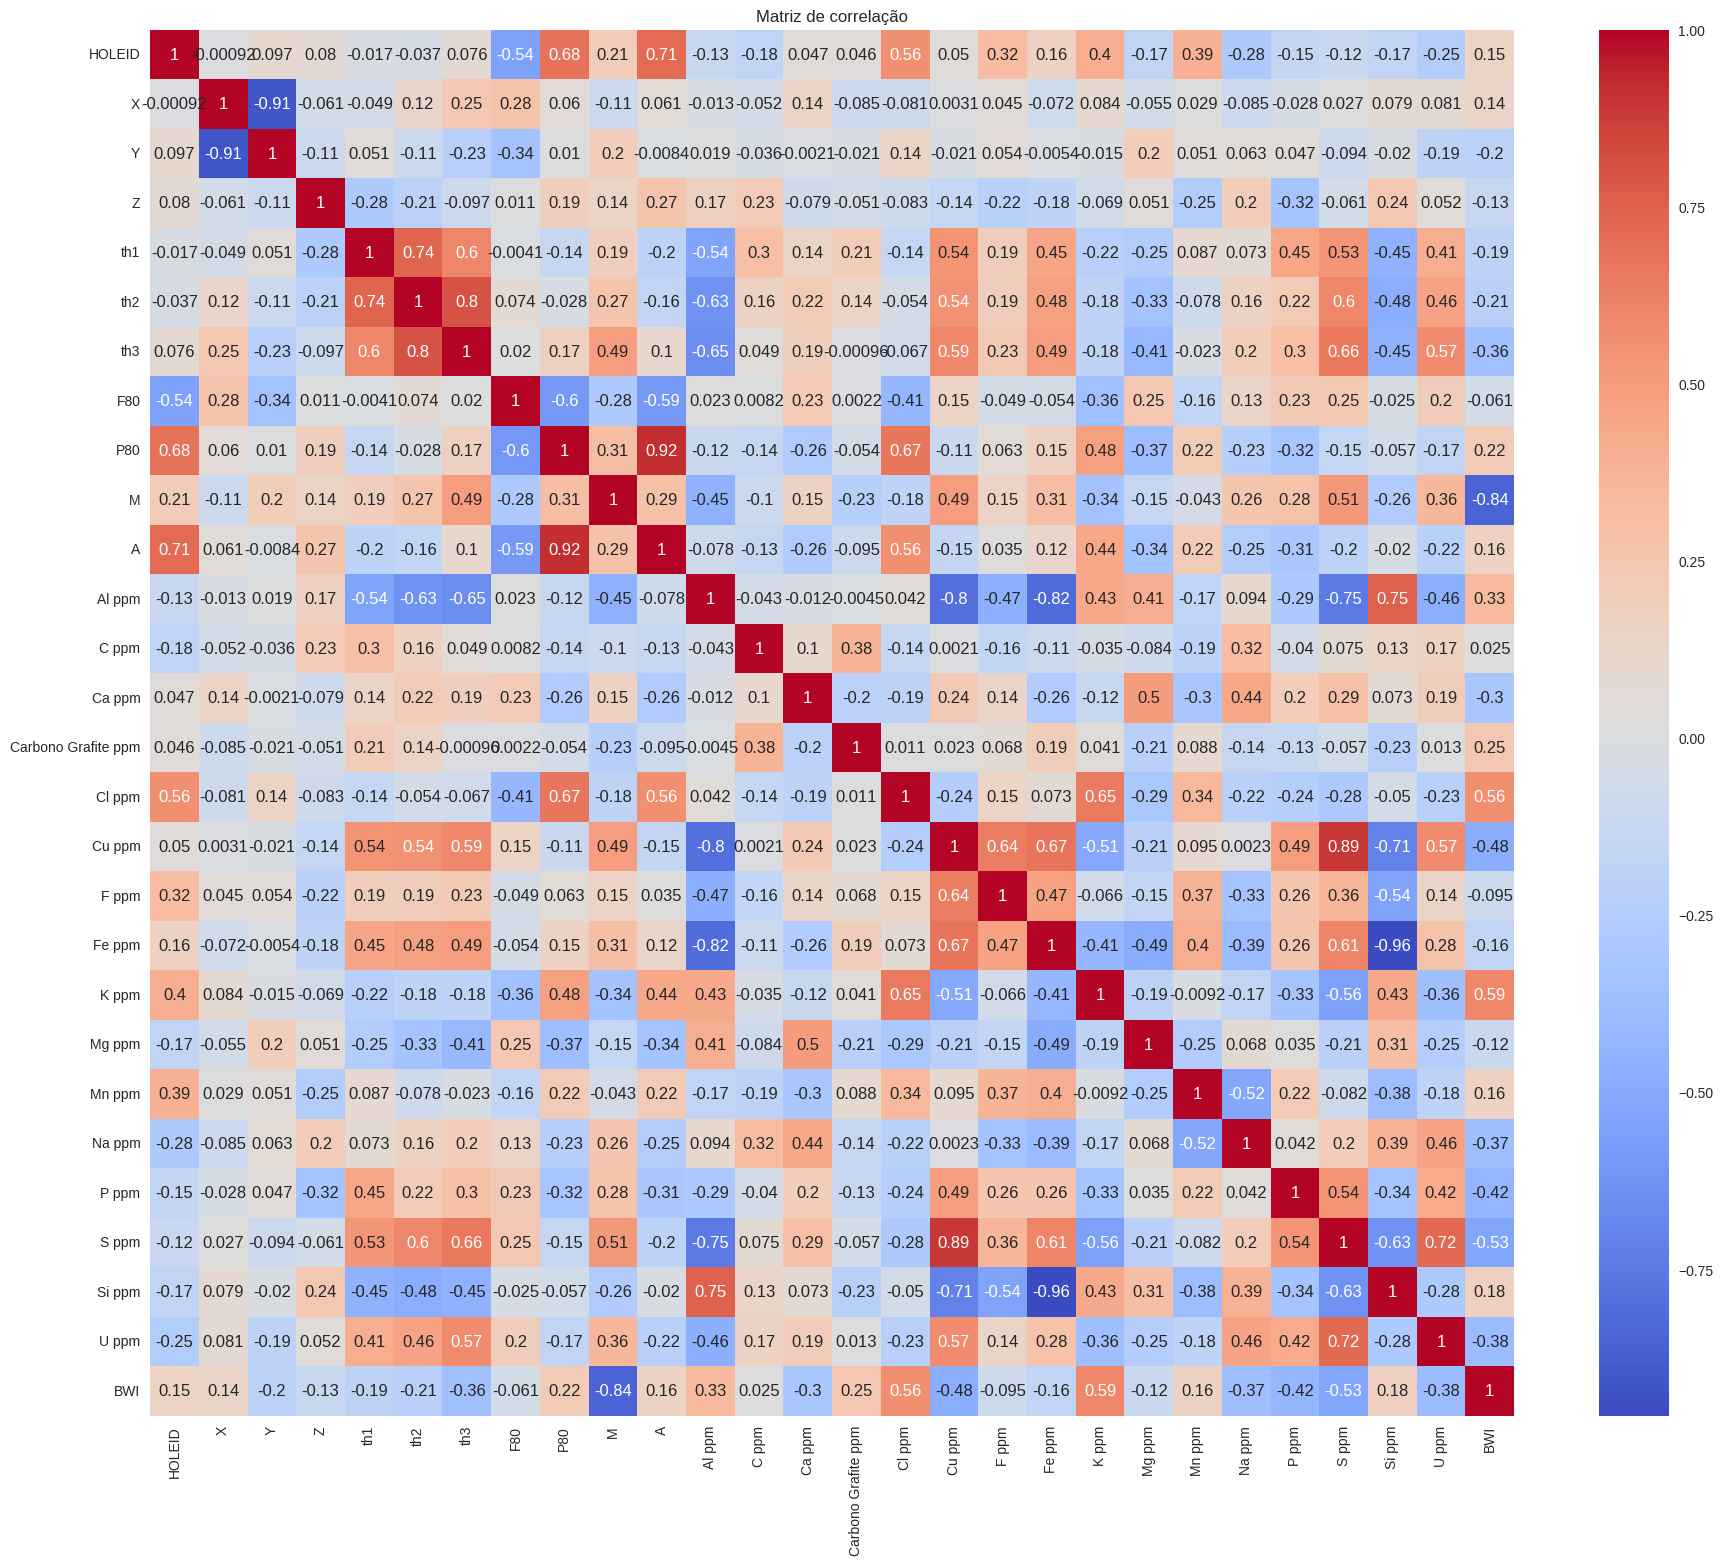

In [72]:
#Agora vamos analisar as correlações das variaveis não apenas com o BWI mas umas com as outras para a partir disso selecionarmos algumas.
plt.figure(figsize=(22, 18))
sns.heatmap(df_comminution.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlação')
plt.show()

Analisando esse quadro podemos escolher melhor as variáveis a serem usadas no modelo principal de regressão e na seleção de operações entre variaveis.

In [73]:
#Aqui se separam as variavéis que podem ser selecionadas para explorar as operações matematicas entre elas dentro do calculo de regressão.
df_temp_comi = df_comminution.copy()
#copia do dataframe original para colocar os valores das operações e pra manter o original inalterado.
colunas_para_remover = ['HOLEID','F80', 'P80', 'M', 'A','BWI','X','Y','Z','th1','th2','th3']
df_temp_comi = df_temp_comi.drop(columns=colunas_para_remover)# Retiram-se as colunas que estão envolvidas na formula inicial do BWI porque o foco é que o modelo faça algo alternartivo, retirando também o holeid, que se trata do numero atribuido ao furo o que é irrelevante e o proprio BWI.

In [74]:
# Crie um DataFrame para armazenar os resultados de correlação das novas variaveis.
resultados_correlacao_comi = pd.DataFrame(columns=['Variável', 'Correlação com BWI'])

correlacao_bwi = df_temp_comi.corrwith(df_comminution['BWI'])

indices_ordenados = correlacao_bwi.abs().sort_values(ascending=False).index

correlacao_final_BWI = correlacao_bwi.loc[indices_ordenados]
print(correlacao_final_BWI)#organizado para mostar os mais diferentes de 0 primeiro

K ppm                  0.594823
Cl ppm                 0.561445
S ppm                 -0.525699
Cu ppm                -0.482526
P ppm                 -0.422081
U ppm                 -0.384692
Na ppm                -0.370649
Al ppm                 0.332311
Ca ppm                -0.304055
Carbono Grafite ppm    0.248076
Si ppm                 0.175802
Fe ppm                -0.164555
Mn ppm                 0.157211
Mg ppm                -0.115298
F ppm                 -0.094998
C ppm                  0.025385
dtype: float64


### [2] PRIMEIRO MODELO DE REGRESSÃO LINEAR MULTIVARIADA DE COMINUIÇÃO

#### AJUSTE DE DADOS

In [75]:
missings = df_temp_comi.isna().sum().sum()
print(f'Missings:{missings}')

Missings:0


In [76]:
X_precomi1c = df_temp_comi.copy()

y_precomi1c = df_comminution['BWI']

In [77]:
# Encontre o índice do NaN em y_preflot
nan_index = X_precomi1c[X_precomi1c.isna()].index[0]

# Remova a linha correspondente de X_preflot e y_preflot
X_precomi1c = X_precomi1c.drop(nan_index)
y_precomi1c = y_precomi1c.drop(nan_index)

# Verifique novamente se há NaNs
print("NaNs em X_precomi após remoção:", X_precomi1c.isna().sum().sum())
print("NaNs em y_precomi após remoção:", y_precomi1c.isna().sum())
print("Número de linhas em X_precomi:", len(X_precomi1c))
print("Número de linhas em y_precomi:", len(y_precomi1c))

NaNs em X_precomi após remoção: 0
NaNs em y_precomi após remoção: 0
Número de linhas em X_precomi: 56
Número de linhas em y_precomi: 56


#### APLICAÇÃO DO MODELO COM STEPWISE

O método stepwise é um procedimento iterativo que adiciona ou remove variáveis de um modelo estatístico com base em critérios de significância, buscando um conjunto de preditores que explique bem a variável dependente sem incluir variáveis irrelevantes ou redundantes. Ou seja, de todas a variavéis do dataset, ele seleciona as melhores para serem trabalhadas em outros modelos, essas estão sendo escolhidas para gerarem as novas variavéis de operações matemáticas entre elas.

In [78]:
# adiciona a constante
X_precomi1c = sm.add_constant(X_precomi1c)

In [79]:
#Aplicando Backward regression para selcionar as melhores variáveis.
backselect1c = step_reg.backward_regression(X_precomi1c, y_precomi1c, 0.05,verbose=False)
backselect1c

['const', 'Carbono Grafite ppm', 'Cl ppm', 'Cu ppm', 'Na ppm']

In [80]:
X_backselect1c = X_precomi1c[backselect1c]
# add a constant
X_backselect1c = sm.add_constant(X_backselect1c)

# define the model and fit it
backmodel1c = sm.OLS(y_precomi1c, X_backselect1c)

backres1c = backmodel1c.fit(cov_type='HC1')

backres1c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BWI   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     32.04
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           2.34e-13
Time:                        00:13:36   Log-Likelihood:                -105.00
No. Observations:                  56   AIC:                             220.0
Df Residuals:                      51   BIC:                             230.1
Df Model:                           4                                         
Covariance Type:                  HC1                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  18.8633      0.665     28.345      0.000      17.559      20.168
Carbono Grafite ppm     0.0021      0.001      2.516      0.012       0.000       0.004
Cl ppm                  0.0006      0.000      4.008      0.000       0.000       0.001
Cu ppm                 -0.0001   1.99e-05     -5.364      0.000      -0.000   -6.79e-05
Na ppm                 -0.0001    2.3e-05     -4.558      0.000      -0.000   -5.98e-05
==============================================================================
Omnibus:                        2.662   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.264   Jarque-Bera (JB):                1.930
Skew:                           0.181   Prob(JB):                        0.381
Kurtosis:                       3.834   Cond. No.                     4.09e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 4.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
#Aplicando Foward regression para escolher as melhores variáveis.

forwardselect1c = step_reg.forward_regression(X_precomi1c, y_precomi1c, 0.05,verbose=False)
forwardselect1c

['const', 'K ppm', 'Na ppm', 'Cu ppm', 'Cl ppm', 'Carbono Grafite ppm']

In [82]:
# add a constant
X_frontselect1c = X_precomi1c[forwardselect1c]
X_frontselect1c = sm.add_constant(X_frontselect1c)

# define the model and fit it
frontmodel1c = sm.OLS(y_precomi1c, X_frontselect1c)

frontres1c = frontmodel1c.fit(cov_type='HC1')

frontres1c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BWI   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     28.75
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           1.30e-13
Time:                        00:13:36   Log-Likelihood:                -104.24
No. Observations:                  56   AIC:                             220.5
Df Residuals:                      50   BIC:                             232.6
Df Model:                           5                                         
Covariance Type:                  HC1                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  18.2795      0.758     24.118      0.000      16.794      19.765
K ppm                5.368e-05    4.2e-05      1.277      0.202   -2.87e-05       0.000
Na ppm                 -0.0001   2.32e-05     -4.417      0.000      -0.000   -5.71e-05
Cu ppm              -9.046e-05   1.98e-05     -4.569      0.000      -0.000   -5.17e-05
Cl ppm                  0.0005      0.000      2.440      0.015    9.26e-05       0.001
Carbono Grafite ppm     0.0021      0.001      2.386      0.017       0.000       0.004
==============================================================================
Omnibus:                        4.268   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                4.860
Skew:                           0.040   Prob(JB):                       0.0881
Kurtosis:                       4.441   Cond. No.                     7.45e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 7.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
# Gera a equação da regressão
params1c = backres1c.params
pvals1c = backres1c.pvalues
# Inicia a equação

intercepto_valor = params1c['const']
intercepto_sinal = " + " if intercepto_valor >= 0 else " - "
equacao1c = f"BWI = {intercepto_sinal}{abs(intercepto_valor):.2e}"

# Adiciona os termos significativos (p <= 0.05), excluindo a constante
for var in params1c.index:
    if var != 'const' and pvals1c[var] <= 0.05: # Verifica se não é a constante e se o p-valor é significativo
        sinal = " + " if params1c[var] >= 0 else " - "
        equacao1c += f"{sinal}{abs(params1c[var]):.2e}*{var}"

# Ajusta sinal inicial, se necessário (para o intercepto)
if equacao1c.startswith("BWI = + "):
    equacao1c = equacao1c.replace("BWI = + ", "BWI = ")

# Exibe a equação
print("\n--- Equação da Regressão ---")
print(equacao1c)


--- Equação da Regressão ---
BWI =  + 1.89e+01 + 2.12e-03*Carbono Grafite ppm + 6.01e-04*Cl ppm - 1.07e-04*Cu ppm - 1.05e-04*Na ppm


### [3] EXPLORANDO OPERAÇÕES ENTRE AS VARIAVÉIS DO DATASET DE COMINUIÇÃO

In [84]:
variaveis_selecionadas_orig = X_precomi1c[backselect1c]#as variaveis selecionadas para a geração das novas são as escolhidas pelo modelo stepwise.
variaveis_selecionadas_orig.drop(columns=['const'], inplace=True)

df_temp_comi_soesp = df_temp_comi.copy()
df_temp_comi_sonov = df_temp_comi.copy()

#### RAZÃO

In [85]:
# Alem das correlações diretas entre as variaveis do dataset e o BWI, pode-se testar a correlação com o resultado de operações entre variaveis
# Lista de colunas para testar as razões.
colunas_para_razoes = variaveis_selecionadas_orig
# Cria um DataFrame para armazenar as novas colunas temporariamente
df_novas_div = pd.DataFrame()

# Crie uma lista para armazenar os resultados da correlação
resultados_correlacao_lista = []
# Loop para testar as razões
for col1 in colunas_para_razoes:
    for col2 in colunas_para_razoes:
        # Evite a divisão por zero e a razão de um elemento por ele mesmo
        if col1 != col2 and df_comminution[col2].min() > 0:

            # Crie o nome da nova variável
            nova_coluna_nome = f'Razao_{col1}_{col2}'

            # Calcule a razão e adicione ao DataFrame temporário
            df_novas_div[nova_coluna_nome] = df_comminution[col1] / df_comminution[col2]

            # Calcule a correlação da nova variável com o BWI
            correlacao = df_comminution['BWI'].corr(df_novas_div[nova_coluna_nome])

            # Adicione o resultado à lista
            resultados_correlacao_lista.append({'Variável': nova_coluna_nome, 'Correlação com BWI': correlacao})

# Depois do loop, converta a lista em um DataFrame e junte ao df de variaveis geral
resultados_correlacao = pd.DataFrame(resultados_correlacao_lista)
df_temp_comi = pd.concat([df_temp_comi, df_novas_div], axis=1)
df_temp_comi_sonov = pd.concat([df_temp_comi_sonov, df_novas_div], axis=1)

# Ordene os resultados pela correlação em valor absoluto para ver as mais fortes
resultados_correlacao['Correlação_Absoluta'] = resultados_correlacao['Correlação com BWI'].abs()
resultados_correlacao = resultados_correlacao.sort_values(by='Correlação_Absoluta', ascending=False)

# Imprima o top 10 das melhores correlações encontradas
print("top 10 das melhores correlações encontradas")
print(resultados_correlacao.head(10))
print("\nValor das novas variaveis(exemplos)")
print(df_temp_comi.head(5))

top 10 das melhores correlações encontradas
                            Variável  Correlação com BWI  Correlação_Absoluta
6   Razao_Cu ppm_Carbono Grafite ppm           -0.545803             0.545803
4                Razao_Cl ppm_Cu ppm            0.521645             0.521645
1   Razao_Carbono Grafite ppm_Cu ppm            0.454450             0.454450
10               Razao_Na ppm_Cl ppm           -0.422121             0.422121
7                Razao_Cu ppm_Cl ppm           -0.409787             0.409787
9   Razao_Na ppm_Carbono Grafite ppm           -0.364743             0.364743
5                Razao_Cl ppm_Na ppm            0.333732             0.333732
0   Razao_Carbono Grafite ppm_Cl ppm           -0.276260             0.276260
2   Razao_Carbono Grafite ppm_Na ppm            0.204407             0.204407
11               Razao_Na ppm_Cu ppm           -0.199714             0.199714

Valor das novas variaveis(exemplos)
         Al ppm  C ppm        Ca ppm  Carbono Grafite ppm    

#### MULTIPLICAÇÃO

In [86]:
# Lista de colunas para testar as multiplicações
colunas_para_multi = variaveis_selecionadas_orig

# Crie um DataFrame para armazenar as novas colunas temporariamente
df_novas_multi = pd.DataFrame()

# Loop para testar as multiplicações
for col1 in colunas_para_multi:
    for col2 in colunas_para_multi:
        # Evita a multiplicação de um elemento por ele mesmo
        if col1 != col2:

            # Cria o nome da nova variável (ex: 'Multi_K_Cl')
            nova_coluna_nome = f'Multi_{col1}_{col2}'

            # Calcule a multiplicação e adicione ao DataFrame temporário
            df_novas_multi[nova_coluna_nome] = df_comminution[col1] * df_comminution[col2]

            # Calcule a correlação da nova variável com o BWI
            correlacao = df_comminution['BWI'].corr(df_novas_multi[nova_coluna_nome])

            # Adicione o resultado ao DataFrame de resultados
            resultados_correlacao = pd.concat([resultados_correlacao, pd.DataFrame([{'Variável': nova_coluna_nome, 'Correlação com BWI': correlacao}])], ignore_index=True)

# Depois do loop, junte o DataFrame de novas variáveis ao principal
df_temp_comi = pd.concat([df_temp_comi, df_novas_multi], axis=1)
df_temp_comi_sonov = pd.concat([df_temp_comi_sonov, df_novas_multi], axis=1)

# Ordene os resultados pela correlação em valor absoluto para ver as mais fortes
resultados_correlacao['Correlação_Absoluta'] = resultados_correlacao['Correlação com BWI'].abs()
resultados_correlacao = resultados_correlacao.sort_values(by='Correlação_Absoluta', ascending=False)

# Imprima o top 10 das melhores correlações encontradas
print("top 10 das melhores correlações encontradas")
print(resultados_correlacao.head(10))
print("Valor das novas variaveis(exemplos)")
print(df_temp_comi.head(5))

top 10 das melhores correlações encontradas
                            Variável  Correlação com BWI  Correlação_Absoluta
12  Multi_Carbono Grafite ppm_Cl ppm            0.625963             0.625963
15  Multi_Cl ppm_Carbono Grafite ppm            0.625963             0.625963
0   Razao_Cu ppm_Carbono Grafite ppm           -0.545803             0.545803
1                Razao_Cl ppm_Cu ppm            0.521645             0.521645
23               Multi_Na ppm_Cu ppm           -0.464674             0.464674
20               Multi_Cu ppm_Na ppm           -0.464674             0.464674
2   Razao_Carbono Grafite ppm_Cu ppm            0.454450             0.454450
3                Razao_Na ppm_Cl ppm           -0.422121             0.422121
4                Razao_Cu ppm_Cl ppm           -0.409787             0.409787
5   Razao_Na ppm_Carbono Grafite ppm           -0.364743             0.364743
Valor das novas variaveis(exemplos)
         Al ppm  C ppm        Ca ppm  Carbono Grafite ppm     

#### SOMA

In [87]:
colunas_para_soma = variaveis_selecionadas_orig
# Crie um DataFrame para armazenar as novas colunas temporariamente
df_novas_somas = pd.DataFrame()

# Loop para testar as somas
for col1 in colunas_para_soma:
    for col2 in colunas_para_soma:
        # Evita a soma de um elemento por ele mesmo
        if col1 != col2:

            # Cria o nome da nova variável (ex: 'Soma_K_Cl')
            nova_coluna_nome = f'Soma_{col1}_{col2}'

            # Calcula a soma e adiciona ao DataFrame temporário
            df_novas_somas[nova_coluna_nome] = df_comminution[col1] + df_comminution[col2]

            # Calcule a correlação da nova variável com o BWI
            correlacao = df_comminution['BWI'].corr(df_novas_somas[nova_coluna_nome])

            # Adicione o resultado ao DataFrame de resultados
            resultados_correlacao = pd.concat([resultados_correlacao, pd.DataFrame([{'Variável': nova_coluna_nome, 'Correlação com BWI': correlacao}])], ignore_index=True)

# Depois do loop, junte o DataFrame de novas variáveis ao principal
df_temp_comi= pd.concat([df_temp_comi, df_novas_somas], axis=1)
df_temp_comi_sonov = pd.concat([df_temp_comi_sonov, df_novas_somas], axis=1)

# Ordene os resultados pela correlação em valor absoluto para ver as mais fortes
resultados_correlacao['Correlação_Absoluta'] = resultados_correlacao['Correlação com BWI'].abs()
resultados_correlacao = resultados_correlacao.sort_values(by='Correlação_Absoluta', ascending=False)

# Imprima o top 10 das melhores correlações encontradas
print("top 10 das melhores correlações encontradas")
print(resultados_correlacao.head(10))
print("Valor das novas variaveis(exemplos)")
print(df_temp_comi.head(5))

top 10 das melhores correlações encontradas
                            Variável  Correlação com BWI  Correlação_Absoluta
0   Multi_Carbono Grafite ppm_Cl ppm            0.625963             0.625963
1   Multi_Cl ppm_Carbono Grafite ppm            0.625963             0.625963
32                Soma_Cu ppm_Na ppm           -0.604964             0.604964
35                Soma_Na ppm_Cu ppm           -0.604964             0.604964
24   Soma_Carbono Grafite ppm_Cl ppm            0.591878             0.591878
27   Soma_Cl ppm_Carbono Grafite ppm            0.591878             0.591878
2   Razao_Cu ppm_Carbono Grafite ppm           -0.545803             0.545803
3                Razao_Cl ppm_Cu ppm            0.521645             0.521645
30   Soma_Cu ppm_Carbono Grafite ppm           -0.474872             0.474872
25   Soma_Carbono Grafite ppm_Cu ppm           -0.474872             0.474872
Valor das novas variaveis(exemplos)
         Al ppm  C ppm        Ca ppm  Carbono Grafite ppm     

#### SUBTRAÇÃO

In [88]:
colunas_para_diferenca = variaveis_selecionadas_orig
# Loop para testar as subtrações
#DataFrame para armazenar as novas colunas temporariamente
df_novas_dif = pd.DataFrame()

# Loop para testar as subtrações
for col1 in colunas_para_diferenca:
    for col2 in colunas_para_diferenca:
        if col1 != col2:
            nova_coluna_nome = f'Sub_{col1}_{col2}'
            df_novas_dif[nova_coluna_nome] = df_comminution[col1] - df_comminution[col2]


            correlacao = df_comminution['BWI'].corr(df_novas_dif[nova_coluna_nome])
            resultados_correlacao = pd.concat([resultados_correlacao, pd.DataFrame([{'Variável': nova_coluna_nome, 'Correlação com BWI': correlacao}])], ignore_index=True)

# Depois do loop, junta o DataFrame de novas variáveis ao principal
df_temp_comi = pd.concat([df_temp_comi, df_novas_dif], axis=1)
df_temp_comi_sonov = pd.concat([df_temp_comi_sonov, df_novas_dif], axis=1)

resultados_correlacao['Correlação_Absoluta'] = resultados_correlacao['Correlação com BWI'].abs()
resultados_correlacao = resultados_correlacao.sort_values(by='Correlação_Absoluta', ascending=False)
print("Top 10 das melhores correlações::")
print(resultados_correlacao.head(10))

Top 10 das melhores correlações::
                            Variável  Correlação com BWI  Correlação_Absoluta
0   Multi_Carbono Grafite ppm_Cl ppm            0.625963             0.625963
1   Multi_Cl ppm_Carbono Grafite ppm            0.625963             0.625963
2                 Soma_Cu ppm_Na ppm           -0.604964             0.604964
3                 Soma_Na ppm_Cu ppm           -0.604964             0.604964
4    Soma_Carbono Grafite ppm_Cl ppm            0.591878             0.591878
5    Soma_Cl ppm_Carbono Grafite ppm            0.591878             0.591878
43                 Sub_Cu ppm_Cl ppm           -0.553462             0.553462
40                 Sub_Cl ppm_Cu ppm            0.553462             0.553462
6   Razao_Cu ppm_Carbono Grafite ppm           -0.545803             0.545803
7                Razao_Cl ppm_Cu ppm            0.521645             0.521645


#### LOGARITMO

In [89]:
print("\n Análise de Correlação para LOGARITMOS de Variáveis (Cominuição - BWI) ")
df_novas_log_bwi = pd.DataFrame()
resultados_correlacao_lista_log_bwi = []

for col in variaveis_selecionadas_orig:
    if df_comminution[col].min() > 0:
        nova_coluna_nome = f'Log_{col}'
        df_novas_log_bwi[nova_coluna_nome] = np.log(df_comminution[col])

        correlacao = df_comminution['BWI'].corr(df_novas_log_bwi[nova_coluna_nome])

        if not pd.isna(correlacao):
            resultados_correlacao_lista_log_bwi.append({'Variável': nova_coluna_nome, 'Correlação com BWI': correlacao})

df_temp_comi = pd.concat([df_temp_comi, df_novas_log_bwi], axis=1)
df_temp_comi_sonov = pd.concat([df_temp_comi_sonov, df_novas_log_bwi], axis=1)

resultados_correlacao_log_bwi = pd.DataFrame(resultados_correlacao_lista_log_bwi)
resultados_correlacao_log_bwi['Correlação_Absoluta'] = resultados_correlacao_log_bwi['Correlação com BWI'].abs()
resultados_correlacao_log_bwi = resultados_correlacao_log_bwi.sort_values(by='Correlação_Absoluta', ascending=False)

print("Top 10 Maiores Correlações de LOGARITMOS com BWI:")
print(resultados_correlacao_log_bwi.head(10))

resultados_correlacao = pd.concat([resultados_correlacao, resultados_correlacao_log_bwi], ignore_index=True)


 Análise de Correlação para LOGARITMOS de Variáveis (Cominuição - BWI) 
Top 10 Maiores Correlações de LOGARITMOS com BWI:
                  Variável  Correlação com BWI  Correlação_Absoluta
1               Log_Cl ppm            0.535520             0.535520
2               Log_Cu ppm           -0.433663             0.433663
0  Log_Carbono Grafite ppm            0.330321             0.330321
3               Log_Na ppm           -0.316157             0.316157


#### POTENCIA

In [90]:
print("\n Análise de Correlação para POTÊNCIAS de Variáveis (Cominuição - BWI) ")
df_novas_pot_bwi = pd.DataFrame()
resultados_correlacao_lista_pot_bwi = []

potencia = 2

for col in variaveis_selecionadas_orig:
    nova_coluna_nome = f'Pot{potencia}_{col}'
    df_novas_pot_bwi[nova_coluna_nome] = df_comminution[col] ** potencia

    correlacao = df_comminution['BWI'].corr(df_novas_pot_bwi[nova_coluna_nome])

    if not pd.isna(correlacao):
        resultados_correlacao_lista_pot_bwi.append({'Variável': nova_coluna_nome, 'Correlação com BWI': correlacao})

# Concatena o DataFrame de novas variáveis de potência ao df_temp_comi
df_temp_comi = pd.concat([df_temp_comi, df_novas_pot_bwi], axis=1)
df_temp_comi_sonov = pd.concat([df_temp_comi_sonov, df_novas_pot_bwi], axis=1)

# Cria um DataFrame apenas com os resultados da operação de potência
resultados_correlacao_pot_bwi = pd.DataFrame(resultados_correlacao_lista_pot_bwi)
resultados_correlacao_pot_bwi['Correlação_Absoluta'] = resultados_correlacao_pot_bwi['Correlação com BWI'].abs()
resultados_correlacao_pot_bwi = resultados_correlacao_pot_bwi.sort_values(by='Correlação_Absoluta', ascending=False)

print("Maiores Correlações de POTÊNCIAS com BWI:")
print(resultados_correlacao_pot_bwi.head(10))

resultados_correlacao = pd.concat([resultados_correlacao, resultados_correlacao_pot_bwi], ignore_index=True)


 Análise de Correlação para POTÊNCIAS de Variáveis (Cominuição - BWI) 
Maiores Correlações de POTÊNCIAS com BWI:
                   Variável  Correlação com BWI  Correlação_Absoluta
1               Pot2_Cl ppm            0.512879             0.512879
2               Pot2_Cu ppm           -0.456897             0.456897
3               Pot2_Na ppm           -0.327107             0.327107
0  Pot2_Carbono Grafite ppm            0.159945             0.159945


#### VARIÁVEIS ESPECIAIS

Razões (Ratios)//Propósito (Purpose)

S/Fe	    Um índice S/Fe (sulfidação) é uma representação mais precisa da intensidade da alteração pirítica do que o teor total de S.

Cu/S                  	Usado para diferenciar espécies mineralógicas como bornita, calcopirita, pirita e associações entre elas em um diagrama ternário Cu-Fe-S.

Ag/Cu, Au/Cu	Altos índices Ag/Cu, Au/Cu em rochas comurrences de calcopirita são na verdade amostras com veios de bornita, sobreimpressos com quartzo-molybdenita-pirita, mudando assim para índices Cu/S mais baixos.


K/Al, Na/Al	Uma maneira útil de caracterizar a alteração filítica em depósitos de cobre porfirítico. Pode ser ambíguo, especialmente se ele não diz nada sobre a proporção de clorita ou outros minerais contendo Fe-Mg em uma amostra.


(Ca+Fe)/Mg	Para selecionar composições de carbonatos.


(Al+K)/Mg	Para mapear a alteração argílica e definir proporções relativas de sericita vs. clorita.

(Fe+Ca)/S	Para mapear anidrita vs. pirita.

Ca/Mg	Para mapear calcita vs. dolomita.

In [91]:
# 1. S/Fe
# Nota: A coluna 'S ppm' e 'Fe ppm' são usadas aqui.
# Lidando com a divisão por zero, substituindo por NaN onde o denominador é zero.
df_temp_comi['S_Fe_Ratio'] = np.where(
    df_temp_comi['Fe ppm'] != 0,
    df_temp_comi['S ppm'] / df_temp_comi['Fe ppm'],
    np.nan
)
df_temp_comi_soesp['S_Fe_Ratio'] = np.where(
    df_temp_comi['Fe ppm'] != 0,
    df_temp_comi['S ppm'] / df_temp_comi['Fe ppm'],
    np.nan
)
# 2. Cu/S
# Nota: A coluna 'Cu ppm' e 'S ppm' são usadas aqui.
df_temp_comi['Cu_S_Ratio'] = np.where(
    df_temp_comi['S ppm'] != 0,
    df_temp_comi['Cu ppm'] / df_temp_comi['S ppm'],
    np.nan
)
df_temp_comi_soesp['Cu_S_Ratio'] = np.where(
    df_temp_comi['S ppm'] != 0,
    df_temp_comi['Cu ppm'] / df_temp_comi['S ppm'],
    np.nan
)

# 4. K/Al, Na/Al
# Nota: As colunas 'K ppm', 'Al ppm' e 'Na ppm' são usadas aqui.
df_temp_comi['K_Al_Ratio'] = np.where(
    df_temp_comi['Al ppm'] != 0,
    df_temp_comi['K ppm'] / df_temp_comi['Al ppm'],
    np.nan
)
df_temp_comi['Na_Al_Ratio'] = np.where(
    df_temp_comi['Al ppm'] != 0,
    df_temp_comi['Na ppm'] / df_temp_comi['Al ppm'],
    np.nan
)
df_temp_comi_soesp['K_Al_Ratio'] = np.where(
    df_temp_comi['Al ppm'] != 0,
    df_temp_comi['K ppm'] / df_temp_comi['Al ppm'],
    np.nan
)
df_temp_comi_soesp['Na_Al_Ratio'] = np.where(
    df_temp_comi['Al ppm'] != 0,
    df_temp_comi['Na ppm'] / df_temp_comi['Al ppm'],
    np.nan
)
# 5. (Ca+Fe)/Mg
# Nota: As colunas 'Ca ppm', 'Fe ppm' e 'Mg ppm' são usadas aqui.
df_temp_comi['Ca_Fe_div_Mg'] = np.where(
    df_temp_comi['Mg ppm'] != 0,
    (df_temp_comi['Ca ppm'] + df_temp_comi['Fe ppm']) / df_temp_comi['Mg ppm'],
    np.nan
)
df_temp_comi_soesp['Ca_Fe_div_Mg'] = np.where(
    df_temp_comi['Mg ppm'] != 0,
    (df_temp_comi['Ca ppm'] + df_temp_comi['Fe ppm']) / df_temp_comi['Mg ppm'],
    np.nan
)

# 6. (Al+K)/Mg
# Nota: As colunas 'Al ppm', 'K ppm' e 'Mg ppm' são usadas aqui.
df_temp_comi['Al_K_div_Mg'] = np.where(
    df_temp_comi['Mg ppm'] != 0,
    (df_temp_comi['Al ppm'] + df_temp_comi['K ppm']) / df_temp_comi['Mg ppm'],
    np.nan
)
df_temp_comi_soesp['Al_K_div_Mg'] = np.where(
    df_temp_comi['Mg ppm'] != 0,
    (df_temp_comi['Al ppm'] + df_temp_comi['K ppm']) / df_temp_comi['Mg ppm'],
    np.nan
)

# 7. (Fe+Ca)/S
# Nota: As colunas 'Fe ppm', 'Ca ppm' e 'S ppm' são usadas aqui.
df_temp_comi['Fe_Ca_div_S'] = np.where(
    df_temp_comi['S ppm'] != 0,
    (df_temp_comi['Fe ppm'] + df_temp_comi['Ca ppm']) / df_temp_comi['S ppm'],
    np.nan
)
df_temp_comi_soesp['Fe_Ca_div_S'] = np.where(
    df_temp_comi['S ppm'] != 0,
    (df_temp_comi['Fe ppm'] + df_temp_comi['Ca ppm']) / df_temp_comi['S ppm'],
    np.nan
)

# 8. Ca/Mg
# Nota: As colunas 'Ca ppm' e 'Mg ppm' são usadas aqui.
df_temp_comi['Ca_Mg_Ratio'] = np.where(
    df_temp_comi['Mg ppm'] != 0,
    df_temp_comi['Ca ppm'] / df_temp_comi['Mg ppm'],
    np.nan
)
df_temp_comi_soesp['Ca_Mg_Ratio'] = np.where(
    df_temp_comi['Mg ppm'] != 0,
    df_temp_comi['Ca ppm'] / df_temp_comi['Mg ppm'],
    np.nan
)

# Exibir as primeiras linhas do DataFrame com as novas colunas
print(df_temp_comi_soesp.head())

         Al ppm  C ppm        Ca ppm  Carbono Grafite ppm       Cl ppm  \
0  53061.375831  534.0   7292.257400           372.356497  3313.417644   
1  48197.507191  314.0   3179.290508           372.356497  7358.791487   
2  55575.355450  499.5   3446.445498           372.356497  3093.865094   
3  55596.590909  630.0   4910.984848           372.356497  5555.171937   
4  60304.597701  150.0  11281.609195           372.356497  4345.431327   

        Cu ppm        F ppm         Fe ppm         K ppm       Mg ppm  \
0  9629.671642  4266.926449  287065.387485  20113.863021  6621.980599   
1  3186.012878  2661.370407  229643.336529  28938.287402  6324.065197   
2  3257.792642  1445.783133  239465.402844  22656.358382  6925.118483   
3  4494.798250  2936.507937  272844.696970  25535.603113  6490.530303   
4  3147.990431  2972.972973  238553.639847  26901.626794  8932.950192   

        Mn ppm       Na ppm       P ppm   S ppm         Si ppm      U ppm  \
0  6925.555200   155.000000  230.000000

#### CORRELAÇÃO

In [92]:
#analisando a lista de correlações contando com as operações.
correlacao_bwi = df_temp_comi.corrwith(df_comminution['BWI'])

indices_ordenados = correlacao_bwi.abs().sort_values(ascending=False).index

correlacao_final = correlacao_bwi.loc[indices_ordenados]
print(correlacao_final)#organizado para mostar os mais diferentes de 0 primeiro

Multi_Cl ppm_Carbono Grafite ppm    0.625963
Multi_Carbono Grafite ppm_Cl ppm    0.625963
Soma_Cu ppm_Na ppm                 -0.604964
Soma_Na ppm_Cu ppm                 -0.604964
K ppm                               0.594823
                                      ...   
F ppm                              -0.094998
Multi_Cu ppm_Cl ppm                -0.037109
Multi_Cl ppm_Cu ppm                -0.037109
Ca_Fe_div_Mg                       -0.029075
C ppm                               0.025385
Length: 80, dtype: float64


### [4] SEGUNDO MODELO DE REGRESSÃO LINEAR MULTIVARIADA DE COMINUIÇÃO


MODELO  GERADO  COM AS VARIÁVEIS PRESENTES NO DATASET DE COMMINUÇÃO ORIGINAL E AS NOVAS

#### AJUSTE DE DADOS

In [93]:
missings = df_temp_comi_sonov.isna().sum().sum()
print(f'Missings:{missings}')

Missings:0


In [94]:
X_precomi2c = df_temp_comi_sonov.copy()

y_precomi2c = df_comminution['BWI']

In [95]:
# Encontre o índice do NaN em y_preflot
nan_index = X_precomi2c[X_precomi2c.isna()].index[0]

# Remova a linha correspondente de X_preflot e y_preflot
X_precomi2c = X_precomi2c.drop(nan_index)
y_precomi2c = y_precomi2c.drop(nan_index)

# Verifique novamente se há NaNs
print("NaNs em X_precomi após remoção:", X_precomi2c.isna().sum().sum())
print("NaNs em y_precomi após remoção:", y_precomi2c.isna().sum())
print("Número de linhas em X_precomi:", len(X_precomi2c))
print("Número de linhas em y_precomi:", len(y_precomi2c))

NaNs em X_precomi após remoção: 0
NaNs em y_precomi após remoção: 0
Número de linhas em X_precomi: 56
Número de linhas em y_precomi: 56


#### APLICAÇÃO DO MODELO COM STEPWISE

In [96]:
# adiciona a constante
X_precomi2c = sm.add_constant(X_precomi2c)

In [97]:
#Aplicando Backward regression para selcionar as melhores variáveis.
backselect2c = step_reg.backward_regression(X_precomi2c, y_precomi2c, 0.05,verbose=False)
backselect2c

['const',
 'Multi_Carbono Grafite ppm_Cl ppm',
 'Multi_Carbono Grafite ppm_Na ppm',
 'Multi_Na ppm_Carbono Grafite ppm',
 'Sub_Carbono Grafite ppm_Cu ppm',
 'Sub_Cu ppm_Carbono Grafite ppm']

In [98]:
X_backselect2c = X_precomi2c[backselect2c]
# add a constant
X_backselect2c = sm.add_constant(X_backselect2c)

# define the model and fit it
backmodel2c = sm.OLS(y_precomi2c, X_backselect2c)

backres2c = backmodel2c.fit(cov_type='HC1')

backres2c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BWI   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     3257.
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           1.03e-61
Time:                        00:13:37   Log-Likelihood:                -101.34
No. Observations:                  56   AIC:                             210.7
Df Residuals:                      52   BIC:                             218.8
Df Model:                           3                                         
Covariance Type:                  HC1                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               19.7354      0.465     42.486      0.000      18.825      20.646
Multi_Carbono Grafite ppm_Cl ppm  1.431e-06   2.95e-07      4.848      0.000    8.53e-07    2.01e-06
Multi_Carbono Grafite ppm_Na ppm  -1.41e-07   2.61e-08     -5.403      0.000   -1.92e-07   -8.98e-08
Multi_Na ppm_Carbono Grafite ppm -1.466e-07   2.61e-08     -5.613      0.000   -1.98e-07   -9.54e-08
Sub_Carbono Grafite ppm_Cu ppm     5.58e-05   1.01e-05      5.498      0.000    3.59e-05    7.57e-05
Sub_Cu ppm_Carbono Grafite ppm    -5.58e-05   1.01e-05     -5.498      0.000   -7.57e-05   -3.59e-05
==============================================================================
Omnibus:                        3.174   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.204   Jarque-Bera (JB):                2.850
Skew:                          -0.052   Prob(JB):                        0.240
Kurtosis:                       4.100   Cond. No.                     4.63e+18
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The smallest eigenvalue is 3.22e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [99]:
#Aplicando Foward regression para escolher as melhores variáveis.

forwardselect2c = step_reg.forward_regression(X_precomi2c, y_precomi2c, 0.05,verbose=False)
forwardselect2c

['const',
 'Multi_Cl ppm_Carbono Grafite ppm',
 'Multi_Carbono Grafite ppm_Cl ppm',
 'Soma_Na ppm_Cu ppm',
 'Soma_Cu ppm_Na ppm']

In [100]:
# add a constant
X_frontselect2c = X_precomi2c[forwardselect2c]
X_frontselect2c = sm.add_constant(X_frontselect2c)

# define the model and fit it
frontmodel2c = sm.OLS(y_precomi2c, X_frontselect2c)

frontres2c = frontmodel2c.fit(cov_type='HC1')

frontres2c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BWI   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     3986.
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           2.26e-62
Time:                        00:13:38   Log-Likelihood:                -101.34
No. Observations:                  56   AIC:                             208.7
Df Residuals:                      53   BIC:                             214.7
Df Model:                           2                                         
Covariance Type:                  HC1                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               19.9191      0.493     40.415      0.000      18.953      20.885
Multi_Cl ppm_Carbono Grafite ppm  6.679e-07   1.47e-07      4.553      0.000     3.8e-07    9.55e-07
Multi_Carbono Grafite ppm_Cl ppm  6.692e-07   1.47e-07      4.563      0.000    3.82e-07    9.57e-07
Soma_Na ppm_Cu ppm               -5.571e-05   7.82e-06     -7.123      0.000    -7.1e-05   -4.04e-05
Soma_Cu ppm_Na ppm               -5.571e-05   7.82e-06     -7.123      0.000    -7.1e-05   -4.04e-05
==============================================================================
Omnibus:                        3.087   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                2.736
Skew:                           0.000   Prob(JB):                        0.255
Kurtosis:                       4.083   Cond. No.                     1.19e+18
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The smallest eigenvalue is 1.81e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [101]:
# Gera a equação da regressão
params2c = frontres2c.params
pvals2c = frontres2c.pvalues

intercepto_valor = params2c['const']
intercepto_sinal = " + " if intercepto_valor >= 0 else " - "
equacao2c = f"BWI = {intercepto_sinal}{abs(intercepto_valor):.2e}"

# Adiciona os termos significativos (p <= 0.05), excluindo a constante
for var in params2c.index:
    if var != 'const' and pvals2c[var] <= 0.05: # Verifica se não é a constante e se o p-valor é significativo
        sinal = " + " if params2c[var] >= 0 else " - "
        equacao2c += f"{sinal}{abs(params2c[var]):.2e}*{var}"

# Ajusta sinal inicial, se necessário (para o intercepto)
if equacao2c.startswith("BWI = + "):
    equacao2c = equacao2c.replace("BWI = + ", "BWI = ")

# Exibe a equação
print("\n--- Equação da Regressão ---")
print(equacao2c)


--- Equação da Regressão ---
BWI =  + 1.99e+01 + 6.68e-07*Multi_Cl ppm_Carbono Grafite ppm + 6.69e-07*Multi_Carbono Grafite ppm_Cl ppm - 5.57e-05*Soma_Na ppm_Cu ppm - 5.57e-05*Soma_Cu ppm_Na ppm


### [5] TERCEIRO MODELO DE REGRESSÃO LINEAR MULTIVARIADA DE COMINUIÇÃO


MODELO  GERADO  COM AS VARIÁVEIS PRESENTES NO DATASET DE COMMINUÇÃO ORIGINAL E COM AS ESPECIAIS

#### AJUSTE DE DADOS

In [102]:
missings = df_temp_comi_soesp.isna().sum().sum()
print(f'Missings:{missings}')

Missings:0


In [103]:
X_precomi3c = df_temp_comi_soesp.copy()

y_precomi3c = df_comminution['BWI']

In [104]:
# Encontre o índice do NaN em y_preflot
nan_index = X_precomi3c[X_precomi3c.isna()].index[0]

# Remova a linha correspondente de X_preflot e y_preflot
X_precomi3c = X_precomi3c.drop(nan_index)
y_precomi3c = y_precomi3c.drop(nan_index)

# Verifique novamente se há NaNs
print("NaNs em X_precomi após remoção:", X_precomi3c.isna().sum().sum())
print("NaNs em y_precomi após remoção:", y_precomi3c.isna().sum())
print("Número de linhas em X_precomi:", len(X_precomi3c))
print("Número de linhas em y_precomi:", len(y_precomi3c))

NaNs em X_precomi após remoção: 0
NaNs em y_precomi após remoção: 0
Número de linhas em X_precomi: 56
Número de linhas em y_precomi: 56


#### APLICAÇÃO DO MODELO COM STEPWISE

In [105]:
# adiciona a constante
X_precomi3c = sm.add_constant(X_precomi3c)

In [106]:
#Aplicando Backward regression para selcionar as melhores variáveis.
backselect3c = step_reg.backward_regression(X_precomi3c, y_precomi3c, 0.05,verbose=False)
backselect3c

['const',
 'Al ppm',
 'Carbono Grafite ppm',
 'Cl ppm',
 'Na ppm',
 'Cu_S_Ratio',
 'K_Al_Ratio']

In [107]:
X_backselect3c = X_precomi3c[backselect3c]
# add a constant
X_backselect3c = sm.add_constant(X_backselect3c)

# define the model and fit it
backmodel3c = sm.OLS(y_precomi3c, X_backselect3c)

backres3c = backmodel3c.fit(cov_type='HC1')

backres3c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BWI   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     20.01
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           1.17e-11
Time:                        00:13:39   Log-Likelihood:                -100.09
No. Observations:                  56   AIC:                             214.2
Df Residuals:                      49   BIC:                             228.4
Df Model:                           6                                         
Covariance Type:                  HC1                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  16.0670      1.190     13.500      0.000      13.734      18.400
Al ppm               7.566e-05   1.27e-05      5.956      0.000    5.08e-05       0.000
Carbono Grafite ppm     0.0020      0.001      3.170      0.002       0.001       0.003
Cl ppm                  0.0005      0.000      2.550      0.011       0.000       0.001
Na ppm                 -0.0002   3.77e-05     -4.229      0.000      -0.000   -8.56e-05
Cu_S_Ratio             -1.2960      0.442     -2.931      0.003      -2.163      -0.430
K_Al_Ratio              6.8430      2.397      2.855      0.004       2.145      11.541
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.158
Skew:                           0.023   Prob(JB):                        0.924
Kurtosis:                       3.256   Cond. No.                     7.09e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 7.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
#Aplicando Foward regression para escolher as melhores variáveis.

forwardselect3c = step_reg.forward_regression(X_precomi3c, y_precomi3c, 0.05,verbose=False)
forwardselect3c

['const', 'K ppm', 'S_Fe_Ratio', 'Cu_S_Ratio', 'Na_Al_Ratio']

In [109]:
# add a constant
X_frontselect3c = X_precomi3c[forwardselect3c]
X_frontselect3c = sm.add_constant(X_frontselect3c)

# define the model and fit it
frontmodel3c = sm.OLS(y_precomi3c, X_frontselect3c)

frontres3c = frontmodel3c.fit(cov_type='HC1')

frontres3c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BWI   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     27.09
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           4.42e-12
Time:                        00:13:39   Log-Likelihood:                -106.02
No. Observations:                  56   AIC:                             222.0
Df Residuals:                      51   BIC:                             232.2
Df Model:                           4                                         
Covariance Type:                  HC1                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          22.4829      1.556     14.448      0.000      19.433      25.533
K ppm           0.0002   3.19e-05      5.975      0.000       0.000       0.000
S_Fe_Ratio    -59.4544     19.667     -3.023      0.003     -98.001     -20.907
Cu_S_Ratio     -1.4252      0.485     -2.937      0.003      -2.376      -0.474
Na_Al_Ratio    -6.0227      2.884     -2.088      0.037     -11.676      -0.370
==============================================================================
Omnibus:                        4.573   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                3.774
Skew:                           0.420   Prob(JB):                        0.152
Kurtosis:                       3.955   Cond. No.                     1.92e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 1.92e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
# Gera a equação da regressão
params3c = frontres3c.params
pvals3c = frontres3c.pvalues

intercepto_valor = params3c['const']
intercepto_sinal = " + " if intercepto_valor >= 0 else " - "
equacao3c = f"BWI = {intercepto_sinal}{abs(intercepto_valor):.2e}"

# Adiciona os termos significativos (p <= 0.05), excluindo a constante
for var in params3c.index:
    if var != 'const' and pvals3c[var] <= 0.05: # Verifica se não é a constante e se o p-valor é significativo
        sinal = " + " if params3c[var] >= 0 else " - "
        equacao3c += f"{sinal}{abs(params3c[var]):.2e}*{var}"

# Ajusta sinal inicial, se necessário (para o intercepto)
if equacao3c.startswith("BWI = + "):
    equacao3c = equacao3c.replace("BWI = + ", "BWI = ")

# Exibe a equação
print("\n--- Equação da Regressão ---")
print(equacao3c)


--- Equação da Regressão ---
BWI =  + 2.25e+01 + 1.91e-04*K ppm - 5.95e+01*S_Fe_Ratio - 1.43e+00*Cu_S_Ratio - 6.02e+00*Na_Al_Ratio


### [6] QUARTO MODELO DE REGRESSÃO LINEAR MULTIVARIADA DE COMINUIÇÃO


MODELO  GERADO  COM AS VARIÁVEIS PRESENTES NO DATASET DE COMMINUÇÃO ORIGINAL, COM AS NOVAS E AS ESPECIAIS

#### AJUSTE DE DADOS

In [111]:
missings = df_temp_comi.isna().sum().sum()
print(f'Missings:{missings}')

Missings:0


In [112]:
X_precomi4c = df_temp_comi.copy()

y_precomi4c = df_comminution['BWI']

In [113]:
# Encontre o índice do NaN em y_preflot
nan_index = X_precomi4c[X_precomi4c.isna()].index[0]

# Remova a linha correspondente de X_preflot e y_preflot
X_precomi4c = X_precomi4c.drop(nan_index)
y_precomi4c = y_precomi4c.drop(nan_index)

# Verifique novamente se há NaNs
print("NaNs em X_precomi após remoção:", X_precomi4c.isna().sum().sum())
print("NaNs em y_precomi após remoção:", y_precomi4c.isna().sum())
print("Número de linhas em X_precomi:", len(X_precomi4c))
print("Número de linhas em y_precomi:", len(y_precomi4c))

NaNs em X_precomi após remoção: 0
NaNs em y_precomi após remoção: 0
Número de linhas em X_precomi: 56
Número de linhas em y_precomi: 56


#### APLICAÇÃO DO MODELO COM STEPWISE

In [114]:
# adiciona a constante
X_precomi4c = sm.add_constant(X_precomi4c)

In [115]:
#Aplicando Backward regression para selcionar as melhores variáveis.
backselect4c = step_reg.backward_regression(X_precomi4c, y_precomi4c, 0.05,verbose=False)
backselect4c

['const',
 'Al ppm',
 'Carbono Grafite ppm',
 'Fe ppm',
 'K ppm',
 'Si ppm',
 'U ppm',
 'Razao_Cu ppm_Cl ppm',
 'Razao_Na ppm_Carbono Grafite ppm',
 'Multi_Na ppm_Carbono Grafite ppm',
 'Soma_Carbono Grafite ppm_Cl ppm',
 'Soma_Carbono Grafite ppm_Cu ppm',
 'Soma_Carbono Grafite ppm_Na ppm',
 'Soma_Cl ppm_Carbono Grafite ppm',
 'Soma_Cu ppm_Carbono Grafite ppm',
 'Soma_Na ppm_Carbono Grafite ppm',
 'Sub_Carbono Grafite ppm_Cl ppm',
 'Sub_Carbono Grafite ppm_Cu ppm',
 'Sub_Carbono Grafite ppm_Na ppm',
 'Sub_Cl ppm_Carbono Grafite ppm',
 'Sub_Cu ppm_Carbono Grafite ppm',
 'Sub_Na ppm_Carbono Grafite ppm',
 'Pot2_Carbono Grafite ppm',
 'K_Al_Ratio',
 'Na_Al_Ratio',
 'Al_K_div_Mg',
 'Ca_Mg_Ratio']

In [116]:
X_backselect4c = X_precomi4c[backselect2c]
# add a constant
X_backselect4c = sm.add_constant(X_backselect4c)

# define the model and fit it
backmodel4c = sm.OLS(y_precomi4c, X_backselect4c)

backres4c = backmodel4c.fit(cov_type='HC1')

backres4c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BWI   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     3257.
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           1.03e-61
Time:                        00:13:40   Log-Likelihood:                -101.34
No. Observations:                  56   AIC:                             210.7
Df Residuals:                      52   BIC:                             218.8
Df Model:                           3                                         
Covariance Type:                  HC1                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               19.7354      0.465     42.486      0.000      18.825      20.646
Multi_Carbono Grafite ppm_Cl ppm  1.431e-06   2.95e-07      4.848      0.000    8.53e-07    2.01e-06
Multi_Carbono Grafite ppm_Na ppm  -1.41e-07   2.61e-08     -5.403      0.000   -1.92e-07   -8.98e-08
Multi_Na ppm_Carbono Grafite ppm -1.466e-07   2.61e-08     -5.613      0.000   -1.98e-07   -9.54e-08
Sub_Carbono Grafite ppm_Cu ppm     5.58e-05   1.01e-05      5.498      0.000    3.59e-05    7.57e-05
Sub_Cu ppm_Carbono Grafite ppm    -5.58e-05   1.01e-05     -5.498      0.000   -7.57e-05   -3.59e-05
==============================================================================
Omnibus:                        3.174   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.204   Jarque-Bera (JB):                2.850
Skew:                          -0.052   Prob(JB):                        0.240
Kurtosis:                       4.100   Cond. No.                     4.63e+18
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The smallest eigenvalue is 3.22e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [117]:
#Aplicando Foward regression para escolher as melhores variáveis.

forwardselect4c = step_reg.forward_regression(X_precomi4c, y_precomi4c, 0.05,verbose=False)
forwardselect4c

['const',
 'Multi_Cl ppm_Carbono Grafite ppm',
 'Multi_Carbono Grafite ppm_Cl ppm',
 'Soma_Na ppm_Cu ppm',
 'Soma_Cu ppm_Na ppm',
 'Cu_S_Ratio',
 'K_Al_Ratio']

In [118]:
# add a constant
X_frontselect4c = X_precomi4c[forwardselect4c]
X_frontselect4c = sm.add_constant(X_frontselect4c)

# define the model and fit it
frontmodel4c = sm.OLS(y_precomi4c, X_frontselect4c)

frontres4c = frontmodel4c.fit(cov_type='HC1')

frontres4c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BWI   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     32.96
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           1.41e-13
Time:                        00:13:42   Log-Likelihood:                -96.859
No. Observations:                  56   AIC:                             203.7
Df Residuals:                      51   BIC:                             213.8
Df Model:                           4                                         
Covariance Type:                  HC1                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               21.5943      1.148     18.804      0.000      19.344      23.845
Multi_Cl ppm_Carbono Grafite ppm  5.973e-07   1.46e-07      4.087      0.000    3.11e-07    8.84e-07
Multi_Carbono Grafite ppm_Cl ppm  5.988e-07   1.46e-07      4.110      0.000    3.13e-07    8.84e-07
Soma_Na ppm_Cu ppm               -6.041e-05   9.08e-06     -6.650      0.000   -7.82e-05   -4.26e-05
Soma_Cu ppm_Na ppm               -6.041e-05   9.08e-06     -6.650      0.000   -7.82e-05   -4.26e-05
Cu_S_Ratio                          -0.9270      0.373     -2.487      0.013      -1.658      -0.196
K_Al_Ratio                           4.3062      2.098      2.052      0.040       0.194       8.419
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.539   Jarque-Bera (JB):                0.553
Skew:                           0.124   Prob(JB):                        0.759
Kurtosis:                       3.419   Cond. No.                     6.49e+18
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The smallest eigenvalue is 6.13e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [119]:
# Gera a equação da regressão
params4c = frontres4c.params
pvals4c = frontres4c.pvalues

intercepto_valor = params4c['const']
intercepto_sinal = " + " if intercepto_valor >= 0 else " - "
equacao4c = f"BWI = {intercepto_sinal}{abs(intercepto_valor):.2e}"

# Adiciona os termos significativos (p <= 0.05), excluindo a constante
for var in params4c.index:
    if var != 'const' and pvals4c[var] <= 0.05: # Verifica se não é a constante e se o p-valor é significativo
        sinal = " + " if params4c[var] >= 0 else " - "
        equacao4c += f"{sinal}{abs(params4c[var]):.2e}*{var}"

# Ajusta sinal inicial, se necessário (para o intercepto)
if equacao4c.startswith("BWI = + "):
    equacao4c = equacao4c.replace("BWI = + ", "BWI = ")

# Exibe a equação
print("\n--- Equação da Regressão ---")
print(equacao4c)


--- Equação da Regressão ---
BWI =  + 2.16e+01 + 5.97e-07*Multi_Cl ppm_Carbono Grafite ppm + 5.99e-07*Multi_Carbono Grafite ppm_Cl ppm - 6.04e-05*Soma_Na ppm_Cu ppm - 6.04e-05*Soma_Cu ppm_Na ppm - 9.27e-01*Cu_S_Ratio + 4.31e+00*K_Al_Ratio


***
# <font size = 12 color = black> COMPARAÇÃO/RESULTADOS </font>
***

### FLOTAÇÃO

In [120]:
#comparações de dados do sumario:
print("modelo 1: variáveis originais",frontres1f.summary())
print("modelo 2: variáveis originais + variáveis novas",backres2f.summary())
print("modelo 3: variáveis originais + variáveis especiais",backres3f.summary())
print("modelo 4: variáveis originais + variáveis novas + variáveis especiais",backres4f.summary())

modelo 1: variáveis originais                             OLS Regression Results                            
Dep. Variable:                    LCT   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     9.835
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           0.000256
Time:                        00:13:42   Log-Likelihood:                 89.031
No. Observations:                  52   AIC:                            -172.1
Df Residuals:                      49   BIC:                            -166.2
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8205 

Modelo 1: Notas e Significados
[1] Standard Errors are heteroscedasticity robust (HC1)

Esta nota informa que os erros padrão calculados não são os tradicionais. Eles foram ajustados usando o método HC1 (Heteroscedasticity Consistent).

Isso é feito para corrigir um problema chamado heterocedasticidade, que ocorre quando a variância dos erros do modelo não é constante. Em termos mais simples, a precisão das previsões do modelo não é a mesma para todas as observações.


[2] The condition number is large, 1.79e+04. This might indicate that there are strong multicollinearity or other numerical problems.

O número de condição é uma medida de multicolinearidade, que é um problema comum em regressão.

Multicolinearidade ocorre quando as variáveis independentes (neste caso, P ppm e Na ppm) estão altamente correlacionadas entre si. Isso torna difícil para o modelo distinguir o efeito individual de cada variável.

Um número de condição grande, como 17.900, é um forte indício de que a multicolinearidade é um problema. Isso pode levar a erros padrão inflados e coeficientes instáveis, o que significa que os resultados podem variar drasticamente com pequenas mudanças nos dados.

Apesar do aviso, as variáveis do modelo foram indivualmente testadas e sua multicolinearidade está o mais controlada possível.

Modelo 2: Notas e Significados
[1] Standard Errors are heteroscedasticity robust (HC1)

A mesma nota do Modelo 1, indicando o uso de erros padrão robustos para lidar com a heterocedasticidade.

[2] The smallest eigenvalue is 1.35e-23. This might indicate that there are strong multicollinearity problems or that the design matrix is singular.

Esta nota, embora diferente na terminologia, aponta para o mesmo problema: multicolinearidade.

A eigenvalue (autovalor) é outra forma de diagnosticar a multicolinearidade. Um autovalor muito próximo de zero, como 1.35×10
−23
 , indica uma dependência linear entre as variáveis independentes.

ANALISANDO OS FATORES AIC E BIC:

O AIC e o BIC são critérios estatísticos usados para selecionar o melhor modelo a partir de um conjunto de modelos candidatos. Eles fornecem uma maneira de equilibrar a qualidade do ajuste do modelo com a sua complexidade.

O que eles medem?
Log-Likelihood (Log-Verossimilhança): É uma medida de quão bem o modelo se ajusta aos dados. Um valor de Log-Likelihood maior (menos negativo) indica um ajuste melhor.

Número de Parâmetros: Refere-se à complexidade do modelo, ou seja, quantas variáveis independentes (exceto a constante) foram incluídas. Quanto mais variáveis, mais complexo o modelo.

Como o AIC e o BIC funcionam
Tanto o AIC (Akaike Information Criterion) quanto o BIC (Bayesian Information Criterion) penalizam modelos mais complexos. Eles levam em conta o Log-Likelihood e adicionam uma penalidade pela quantidade de variáveis. A fórmula geral é:

Critério = -2 * Log-Likelihood + Penalidade por Complexidade

AIC: A penalidade do AIC é menor do que a do BIC, o que faz com que ele tenda a favorecer modelos mais complexos (com mais variáveis).

BIC: A penalidade do BIC é maior. Ele é mais rigoroso na seleção de variáveis e tende a favorecer modelos mais simples e parcimoniosos.

Interpretação e Uso
Para selecionar o melhor modelo entre vários, você deve comparar os valores de AIC e BIC:

O modelo com o menor valor de AIC é considerado o melhor, pois alcança um bom ajuste com a menor penalidade por complexidade.

O modelo com o menor valor de BIC é o preferido, pois favorece a parcimônia (simplicidade do modelo).

In [121]:
previsoes_modelo1 = frontres1f.predict()
previsoes_modelo2 = backres2f.predict()
previsoes_modelo3 = backres3f.predict()
previsoes_modelo4 = backres4f.predict()

# Determinar o menor número de previsões
num_previsoes_min = min(len(previsoes_modelo1), len(previsoes_modelo2), len(previsoes_modelo3), len(previsoes_modelo4))

# Truncar as previsões maiores para o tamanho menor
previsoes_modelo1_ajustadas = previsoes_modelo1[:num_previsoes_min]
previsoes_modelo2_ajustadas = previsoes_modelo2[:num_previsoes_min]
previsoes_modelo3_ajustadas = previsoes_modelo3[:num_previsoes_min]
previsoes_modelo4_ajustadas = previsoes_modelo4[:num_previsoes_min]

# Criar o DataFrame de predições com os tamanhos alinhados
Predicoes = pd.DataFrame(previsoes_modelo1_ajustadas, columns=['Predições 1'])
Predicoes['Predições 2'] = previsoes_modelo2_ajustadas
Predicoes['Predições 3'] = previsoes_modelo3_ajustadas
Predicoes['Predições 4'] = previsoes_modelo4_ajustadas

if 'LCT' in df_flotation.columns:
    Predicoes['LCT'] = df_flotation['LCT'][:num_previsoes_min].values

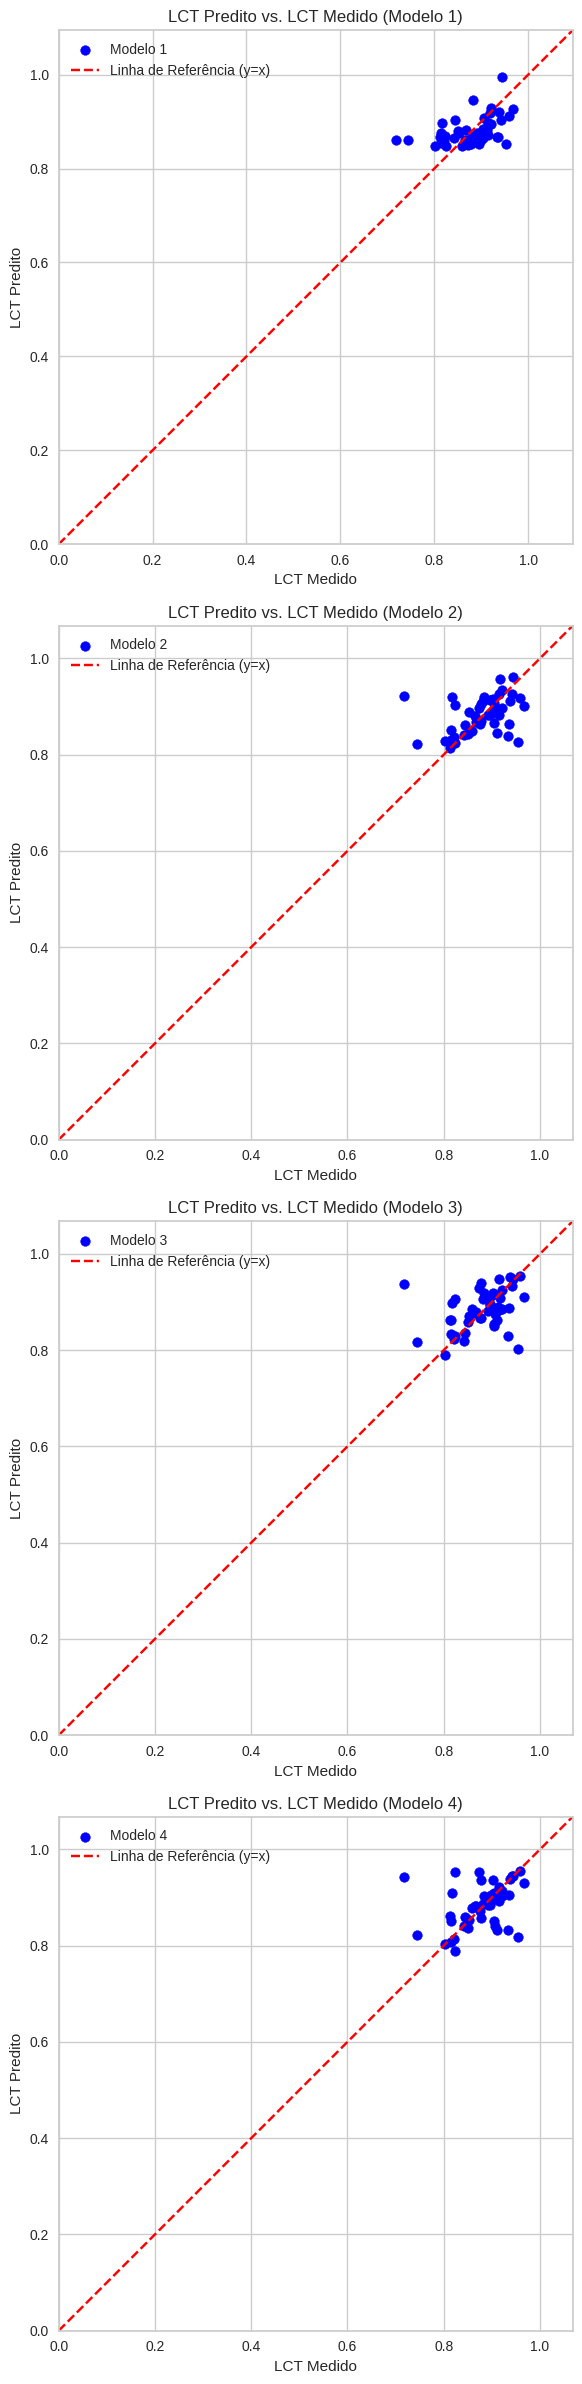

In [122]:
# Ajuste os nomes das colunas de predição se forem diferentes no seu DataFrame
models = ["Predições 1", "Predições 2", "Predições 3", "Predições 4"]
model_names = ["Modelo 1", "Modelo 2", "Modelo 3", "Modelo 4"]

# Criando a figura e os subplots (eixos) para os 4 modelos, um embaixo do outro
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 24))
axes = axes.flatten() # Para facilitar a iteração sobre os subplots

for i, model_col in enumerate(models):
    ax = axes[i]

    # Criar o gráfico de dispersão para cada modelo
    ax.scatter(Predicoes["LCT"], Predicoes[model_col], c="blue", label=model_names[i])

    # Adicionar a linha de referência (y=x) que passa pela origem
    # Definir lim_min como 0 para garantir que o gráfico comece no zero
    lim_min = 0
    # O lim_max é ajustado dinamicamente para incluir todos os seus dados de LCT
    lim_max = max(Predicoes["LCT"].max(), Predicoes[model_col].max()) + 0.1
    ax.plot([lim_min, lim_max], [lim_min, lim_max], color="red", linestyle="--", label="Linha de Referência (y=x)")

    # Configurar os eixos e o título
    ax.set_xlabel("LCT Medido")
    ax.set_ylabel("LCT Predito")
    ax.set_title(f"LCT Predito vs. LCT Medido ({model_names[i]})")
    ax.set_xlim(lim_min, lim_max)
    ax.set_ylim(lim_min, lim_max)
    ax.set_aspect("equal", adjustable="box")
    ax.grid(True)
    ax.legend()

plt.tight_layout()

plt.savefig("graficos_lct_modelos_vertical.png")

# Exibe o gráfico
plt.show()


#### Graficos de resíduo

INTERPRETAÇÃO DOS GRÁFICOS:


1. Gráfico Superior Esquerdo: Resíduos ao longo das observações. Este gráfico mostra os resíduos (a diferença entre os valores observados e os previstos pelo modelo) plotados em ordem, contra o número da observação.

Interpretação: Para um bom modelo, os resíduos devem parecer aleatórios, sem um padrão óbvio. A ausência de um padrão claro sugere que o modelo está capturando bem a estrutura dos dados.

2. Gráfico Superior Direito: Distribuição dos Resíduos em um histograma da distribuição dos resíduos.

Interpretação: Uma das suposições do modelo de regressão linear é que os resíduos têm uma distribuição normal, ou seja, formam uma curva em forma de sino (uma "gaussiana"). A linha azul sobreposta ao histograma é a estimativa da densidade da distribuição, e a forma de sino sugere que a suposição de normalidade está sendo razoavelmente atendida. Isso é importante para a validade dos testes de significância do modelo.

3. Gráfico Inferior Esquerdo: Autocorrelação dos Resíduos (ACF)
Este gráfico mostra o grau de autocorrelação dos resíduos em diferentes defasagens (lags). Autocorrelação significa que um erro em um ponto está correlacionado com um erro em um ponto anterior.

Interpretação: A maioria dos pontos deve estar dentro da área sombreada (o intervalo de confiança). Se um ponto ultrapassa essa área, sugere uma autocorrelação significativa, o que é um problema.  Uma ausência de autocorrelação é ideal, pois significa que os erros são independentes e aleatórios.

4. Gráfico Inferior Direito: Q-Q Plot dos Resíduos
O Q-Q Plot (Quantile-Quantile Plot) compara os quantis dos seus resíduos com os de uma distribuição teórica (neste caso, a distribuição normal).

Interpretação: Para que os resíduos sejam considerados normalmente distribuídos, a maioria dos pontos deve seguir a linha reta vermelha. A linha vermelha representa a distribuição teórica perfeita.



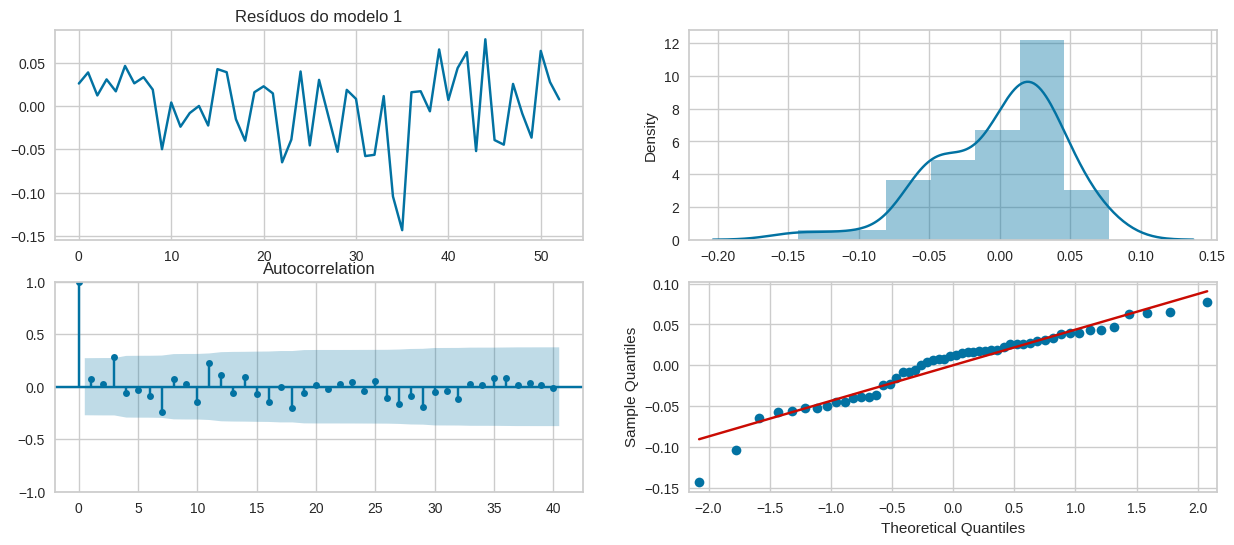

In [123]:
residuos1 = frontres1f.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos1.plot(title="Resíduos do modelo 1", ax=ax[0][0])
sns.distplot(residuos1,ax=ax[0][1])
plot_acf(residuos1,lags=40, ax=ax[1][0])
qqplot(residuos1,line='s', ax=ax[1][1]);

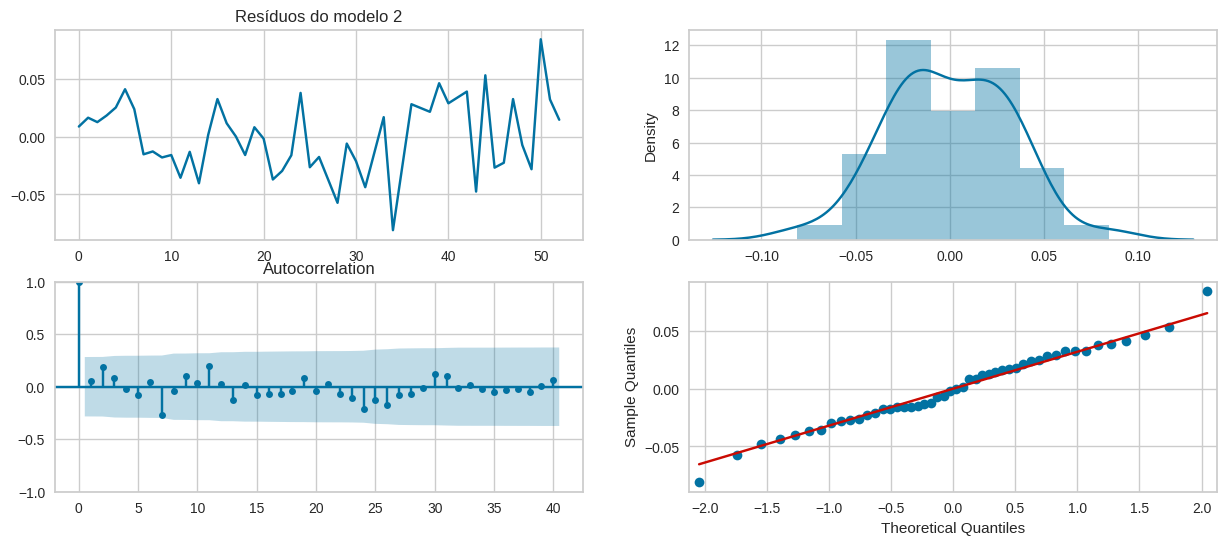

In [124]:
residuos2 = backres2f.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos2.plot(title="Resíduos do modelo 2", ax=ax[0][0])
sns.distplot(residuos2,ax=ax[0][1])
plot_acf(residuos2,lags=40, ax=ax[1][0])
qqplot(residuos2,line='s', ax=ax[1][1]);

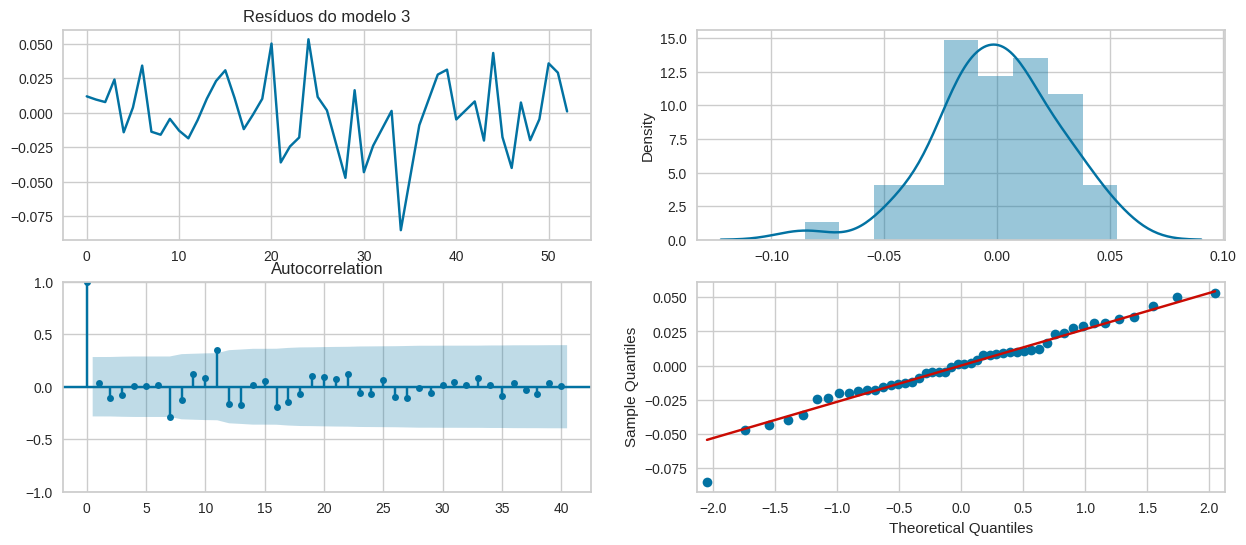

In [125]:
residuos3 = backres3f.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos3.plot(title="Resíduos do modelo 3", ax=ax[0][0])
sns.distplot(residuos3,ax=ax[0][1])
plot_acf(residuos3,lags=40, ax=ax[1][0])
qqplot(residuos3,line='s', ax=ax[1][1]);

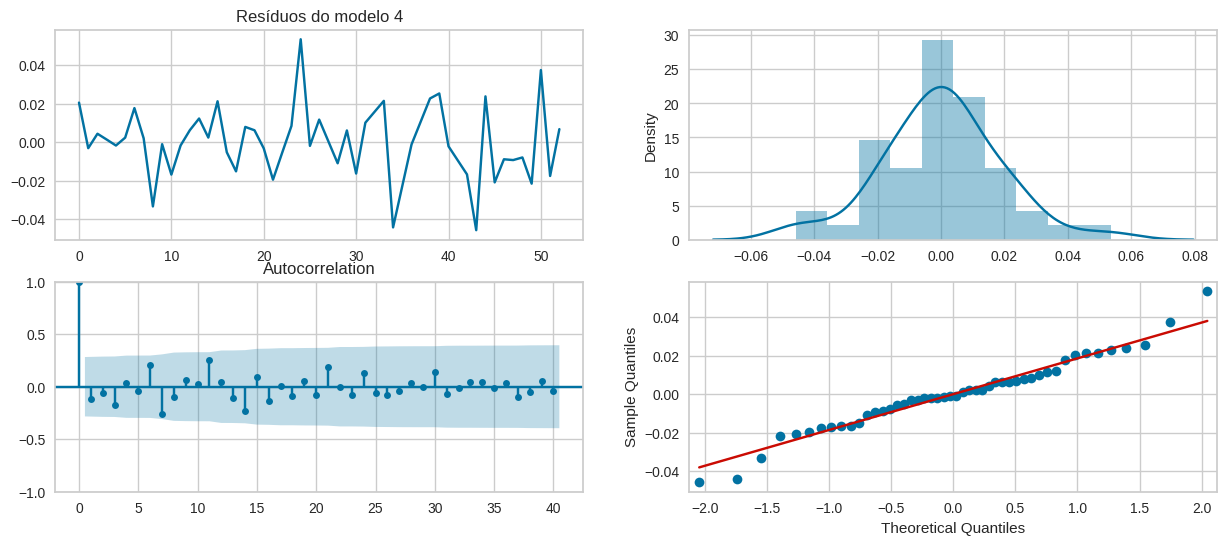

In [126]:
residuos4 = backres4f.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos4.plot(title="Resíduos do modelo 4", ax=ax[0][0])
sns.distplot(residuos4,ax=ax[0][1])
plot_acf(residuos4,lags=40, ax=ax[1][0])
qqplot(residuos4,line='s', ax=ax[1][1]);

#### Conclusão


COM A ANALISE DESSES DADOS É POSSIVEL CONCLUIR QUE O MELHOR MODELO DE FLOTAÇÃO, COM MAIOR R² AJUSTADO FOI O MODELO 4, FEITO COM AS VARIÁVEIS ORIGINAIS, NOVAS E ESPECIAIS.

### COMINUIÇÃO

In [127]:
#comparações de dados do sumario:
print("modelo 1: variáveis originais",backres1c.summary())
print("modelo 2: variáveis originais + variáveis novas",frontres2c.summary())
print("modelo 3: variáveis originais + variáveis especiais",frontres3c.summary())
print("modelo 4: variáveis originais + variáveis novas + variáveis especiais",frontres4c.summary())

modelo 1: variáveis originais                             OLS Regression Results                            
Dep. Variable:                    BWI   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     32.04
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           2.34e-13
Time:                        00:13:46   Log-Likelihood:                -105.00
No. Observations:                  56   AIC:                             220.0
Df Residuals:                      51   BIC:                             230.1
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
cons

Análise do Modelo 1
[1] Standard Errors are heteroscedasticity robust (HC1): Esta nota informa que os erros padrão foram ajustados para corrigir a heterocedasticidade. Isso significa que a variabilidade dos erros não é constante ao longo de todos os dados. O ajuste com o método HC1 garante que os valores p e os intervalos de confiança sejam mais precisos, tornando a inferência sobre a significância das variáveis mais confiável.

[2] The condition number is large, 4.09e+04: Um número de condição grande, como 40.900, sugere a presença de multicolinearidade. A multicolinearidade ocorre quando as variáveis independentesestão correlacionadas entre si. Isso dificulta para o modelo OLS isolar o efeito único de cada variável, o que pode levar a coeficientes instáveis e erros padrão inflados.

Análise do Modelo 2
[1] Standard Errors are heteroscedasticity robust (HC1): Assim como no primeiro modelo, essa nota indica que os erros padrão foram corrigidos para a heterocedasticidade.

[2] The smallest eigenvalue is 1.81e-22: Essa nota aponta para outro problema de multicolinearidade. Um autovalor (eigenvalue) pequeno, próximo de zero, sugere uma dependência linear  entre as variáveis independentes.

ANALISANDO OS FATORES AIC E BIC:

O AIC e o BIC são critérios estatísticos usados para selecionar o melhor modelo a partir de um conjunto de modelos candidatos. Eles fornecem uma maneira de equilibrar a qualidade do ajuste do modelo com a sua complexidade.

O que eles medem?
Log-Likelihood (Log-Verossimilhança): É uma medida de quão bem o modelo se ajusta aos dados. Um valor de Log-Likelihood maior (menos negativo) indica um ajuste melhor.

Número de Parâmetros: Refere-se à complexidade do modelo, ou seja, quantas variáveis independentes (exceto a constante) foram incluídas. Quanto mais variáveis, mais complexo o modelo.

Como o AIC e o BIC funcionam
Tanto o AIC (Akaike Information Criterion) quanto o BIC (Bayesian Information Criterion) penalizam modelos mais complexos. Eles levam em conta o Log-Likelihood e adicionam uma penalidade pela quantidade de variáveis. A fórmula geral é:

Critério = -2 * Log-Likelihood + Penalidade por Complexidade

AIC: A penalidade do AIC é menor do que a do BIC, o que faz com que ele tenda a favorecer modelos mais complexos (com mais variáveis).

BIC: A penalidade do BIC é maior. Ele é mais rigoroso na seleção de variáveis e tende a favorecer modelos mais simples e parcimoniosos.

Interpretação e Uso
Para selecionar o melhor modelo entre vários, você deve comparar os valores de AIC e BIC:

O modelo com o menor valor de AIC é considerado o melhor, pois alcança um bom ajuste com a menor penalidade por complexidade.

O modelo com o menor valor de BIC é o preferido, pois favorece a parcimônia (simplicidade do modelo).

In [128]:
previsoes_modelo1 = backres1c.predict()
previsoes_modelo2 = frontres2c.predict()
previsoes_modelo3 = backres3c.predict()
previsoes_modelo4 = frontres4c.predict()

# Criar o DataFrame de predições com os tamanhos alinhados
Predicoes = pd.DataFrame(previsoes_modelo1, columns=['Predições 1'])
Predicoes['Predições 2'] = previsoes_modelo2
Predicoes['Predições 3'] = previsoes_modelo3
Predicoes['Predições 4'] = previsoes_modelo4

Predicoes['BWI'] = df_comminution['BWI']

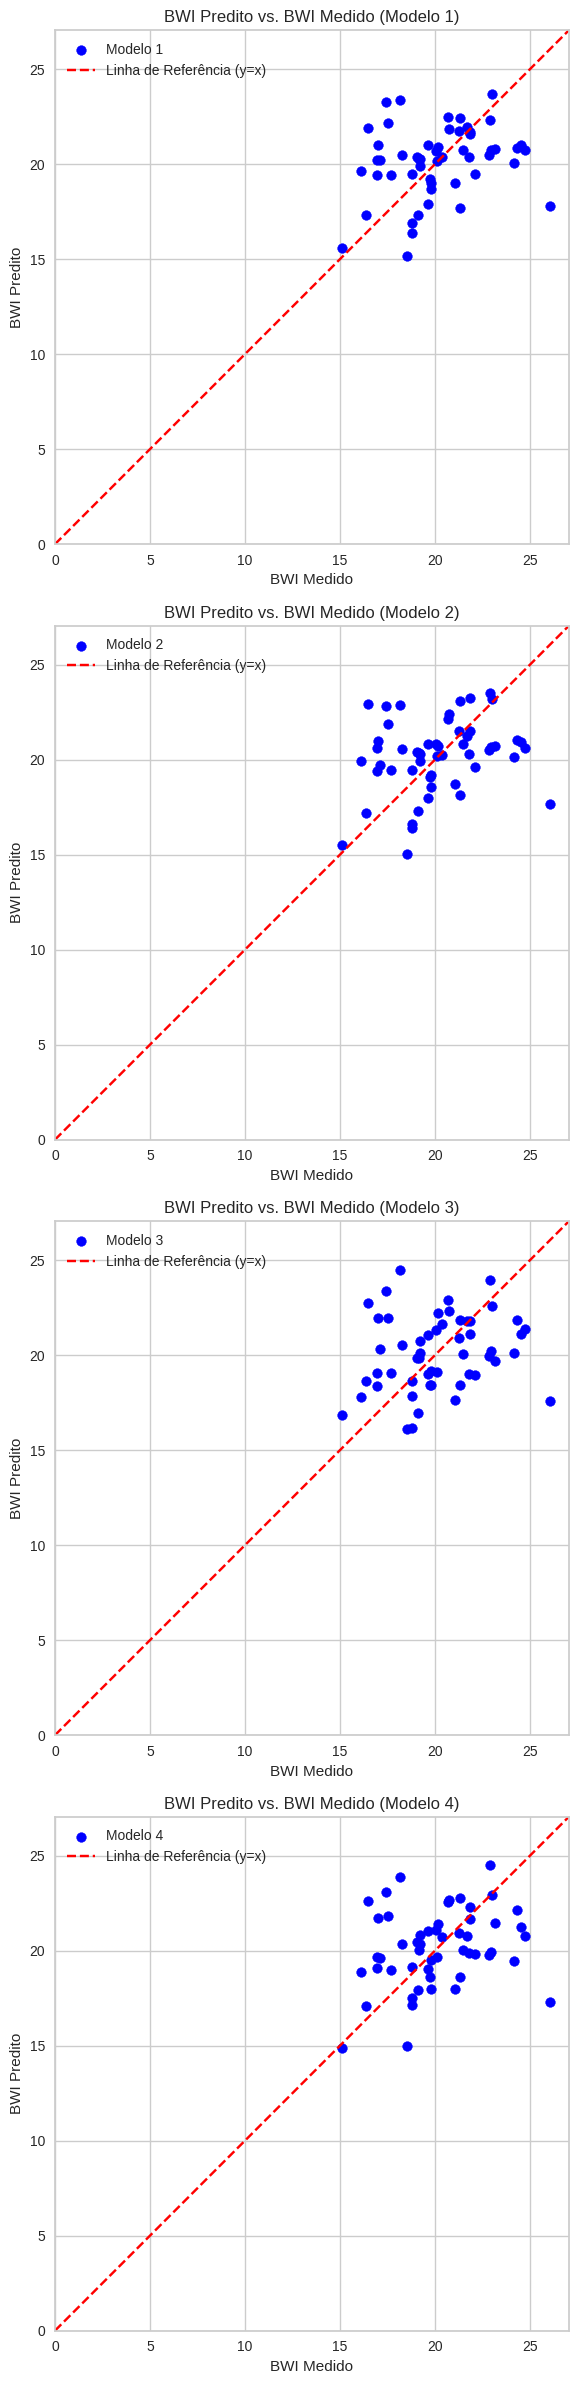

In [129]:
models = ['Predições 1', 'Predições 2', 'Predições 3', 'Predições 4']
model_names = ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4']

# Criando a figura e os subplots (eixos) para os 4 modelos, um embaixo do outro
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 24))
axes = axes.flatten()

for i, model_col in enumerate(models):
    ax = axes[i]
    # Criar o gráfico de dispersão para cada modelo
    ax.scatter(Predicoes['BWI'], Predicoes[model_col], c='blue', label=model_names[i])
    # Adicionar a linha de referência (y=x) que passa pela origem
    # Definir lim_min como 0 para garantir que o gráfico comece no zero
    lim_min = 0
    lim_max = max(Predicoes['BWI'].max(), Predicoes[model_col].max()) + 1
    ax.plot([lim_min, lim_max], [lim_min, lim_max], color='red', linestyle='--', label='Linha de Referência (y=x)')
    # Configurar os eixos e o título
    ax.set_xlabel('BWI Medido')
    ax.set_ylabel('BWI Predito')
    ax.set_title(f'BWI Predito vs. BWI Medido ({model_names[i]})')
    ax.set_xlim(lim_min, lim_max)
    ax.set_ylim(lim_min, lim_max)
    ax.set_aspect('equal', adjustable='box')
    ax.grid(True)
    ax.legend()

plt.tight_layout()

plt.savefig('graficos_bwi_modelos_vertical.png')

plt.show()

#### Gráficos de resíduo

INTERPRETAÇÃO DOS GRÁFICOS:

1 - Gráfico Superior Esquerdo: Resíduos ao longo das observações. Este gráfico mostra os resíduos (a diferença entre os valores observados e os previstos pelo modelo) plotados em ordem, contra o número da observação.
Interpretação: Para um bom modelo, os resíduos devem parecer aleatórios, sem um padrão óbvio. A ausência de um padrão claro sugere que o modelo está capturando bem a estrutura dos dados.

2 - Gráfico Superior Direito: Distribuição dos Resíduos em um histograma da distribuição dos resíduos.
Interpretação: Uma das suposições do modelo de regressão linear é que os resíduos têm uma distribuição normal, ou seja, formam uma curva em forma de sino (uma "gaussiana"). A linha azul sobreposta ao histograma é a estimativa da densidade da distribuição, e a forma de sino sugere que a suposição de normalidade está sendo razoavelmente atendida. Isso é importante para a validade dos testes de significância do modelo.

3 - Gráfico Inferior Esquerdo: Autocorrelação dos Resíduos (ACF) Este gráfico mostra o grau de autocorrelação dos resíduos em diferentes defasagens (lags). Autocorrelação significa que um erro em um ponto está correlacionado com um erro em um ponto anterior.
Interpretação: A maioria dos pontos deve estar dentro da área sombreada (o intervalo de confiança). Se um ponto ultrapassa essa área, sugere uma autocorrelação significativa, o que é um problema. Uma ausência de autocorrelação é ideal, pois significa que os erros são independentes e aleatórios.

4 - Gráfico Inferior Direito: Q-Q Plot dos Resíduos O Q-Q Plot (Quantile-Quantile Plot) compara os quantis dos seus resíduos com os de uma distribuição teórica (neste caso, a distribuição normal).
Interpretação: Para que os resíduos sejam considerados normalmente distribuídos, a maioria dos pontos deve seguir a linha reta vermelha. A linha vermelha representa a distribuição teórica perfeita.

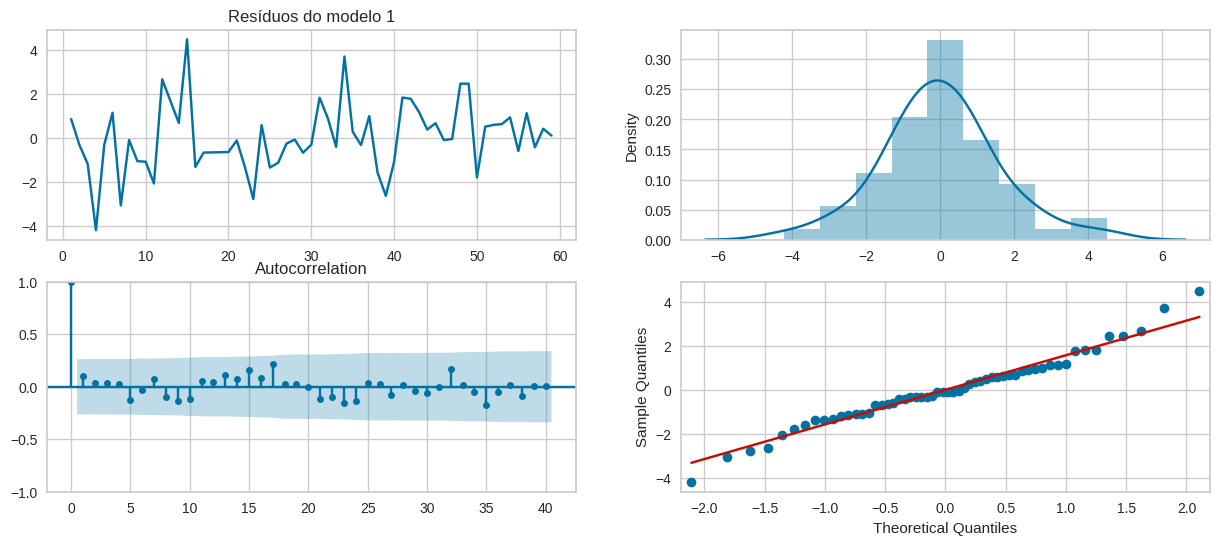

In [130]:
residuos1 = backres1c.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos1.plot(title="Resíduos do modelo 1", ax=ax[0][0])
sns.distplot(residuos1,ax=ax[0][1])
plot_acf(residuos1,lags=40, ax=ax[1][0])
qqplot(residuos1,line='s', ax=ax[1][1]);

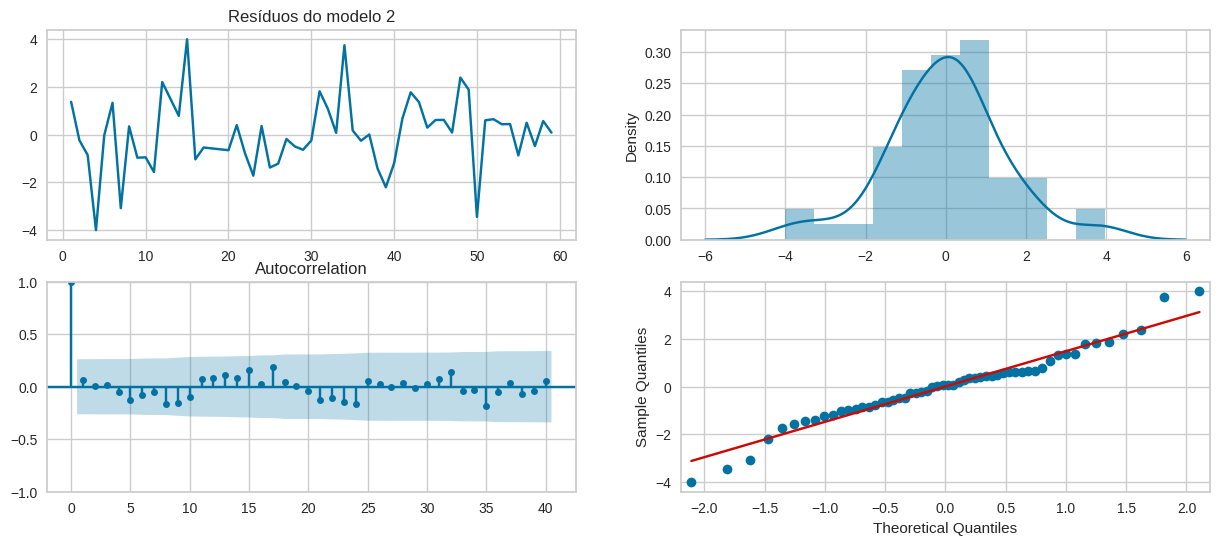

In [131]:
residuos2 = frontres2c.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos2.plot(title="Resíduos do modelo 2", ax=ax[0][0])
sns.distplot(residuos2,ax=ax[0][1])
plot_acf(residuos2,lags=40, ax=ax[1][0])
qqplot(residuos2,line='s', ax=ax[1][1]);

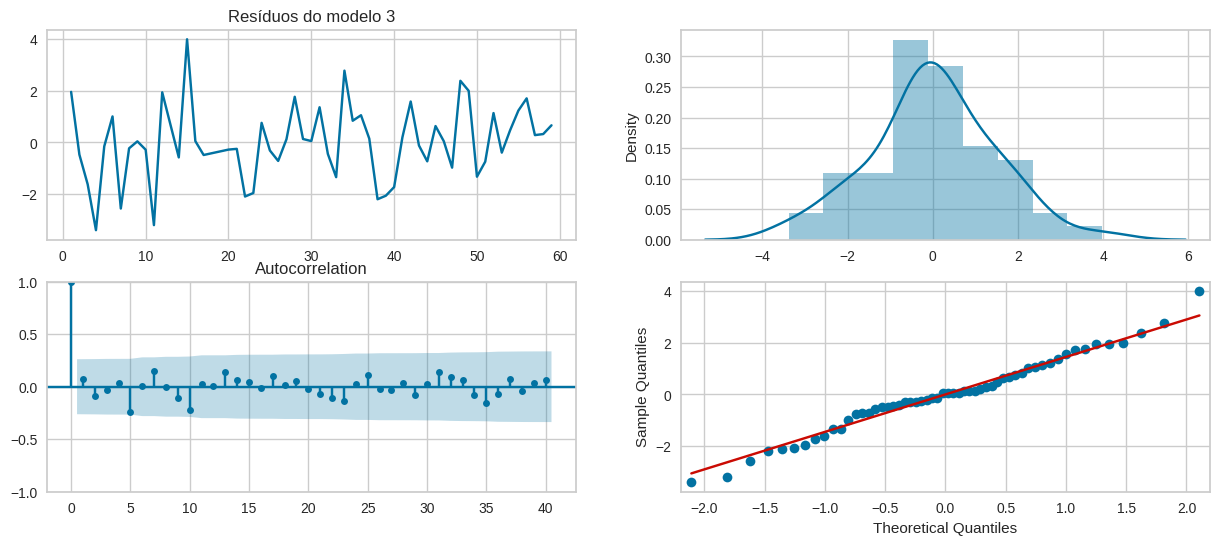

In [132]:
residuos3 = backres3c.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos3.plot(title="Resíduos do modelo 3", ax=ax[0][0])
sns.distplot(residuos3,ax=ax[0][1])
plot_acf(residuos3,lags=40, ax=ax[1][0])
qqplot(residuos3,line='s', ax=ax[1][1]);

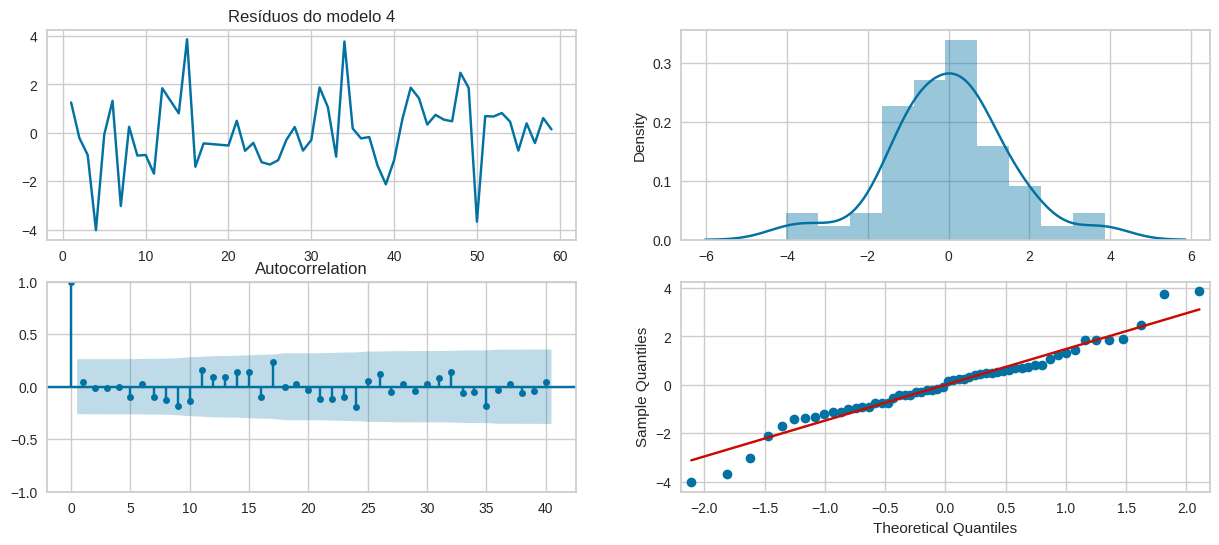

In [133]:
residuos4 = backres4c.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos4.plot(title="Resíduos do modelo 4", ax=ax[0][0])
sns.distplot(residuos4,ax=ax[0][1])
plot_acf(residuos4,lags=40, ax=ax[1][0])
qqplot(residuos4,line='s', ax=ax[1][1]);

#### Conclusão

COM A ANALISE DESSES DADOS É POSSIVEL CONCLUIR QUE O MELHOR MODELO DE COMINUIÇÃO E DE FLOTAÇÃO, COM MAIOR R² AJUSTADO, FOI O MODELO 4, FEITO COM AS VARIÁVEIS ORIGINAIS + NOVAS + ESPECIAIS

***
# <font size = 12 color = RED> REFERÊNCIAS BIBLIOGRÁFRICAS </font>
***

ANDRADE, Rayssa Victória de. Modelagem geometalúrgica do tamanho de produto da prensa de rolos de alta pressão de uma mina de ferro. 2024. Monografia (Trabalho de Conclusão de Curso) - Departamento de Engenharia de Minas, Universidade Federal de Minas Gerais, Belo Horizonte, 2024.



https://blog.deepsim.ca/stepwise-regression-package-python/


GeoMet dataset - https://zenodo.org/records/7051975

Ratios in Geometallurgy - https://www.youtube.com/watch?v=tfxkDFJY9lE